# Bootcamp: Construa seu Portfólio em Ciência de Dados

**Autora**: Yanna Cavalcanti

**Data**: Junho 2023

---

## Projeto: Detecção dos principais drivers de churn para retenção de clientes

#### Indústria e mercado

Esse projeto se enquadra na indústria de telecomunicações. Empresas de telecomunicações conhecidas no setor incluem **Vivo**, **Tim** e **Claro**.

#### Contexto

Você foi contratado como cientista de dados por uma empresa de telecomunicações que enfrenta um problema crescente de churn. A empresa deseja reduzir a taxa de cancelamento de seus clientes, aumentando a satisfação e a fidelidade dos mesmos.  Atualmente, a empresa não possui nenhum modelo ou estratégia específica para prever o churn e tomar ações preventivas.

![churn1](https://miro.medium.com/v2/resize:fit:400/0*I9LmVPMFSuDwHumR)

#### Objetivo

Seu objetivo é identificar os principais drivers de churn para a criação de estratégias de retenção. Você fará isso a partir de uma análise exploratória e do desenvolvimento de um modelo de aprendizado de máquina que seja capaz de prever quais clientes estão mais propensos a cancelar o serviço (churn), com base no conjunto de atributos relacionados ao comportamento e no uso dos serviços de telecomunicações. A identificação dos principais drivers acionáveis e como eles interagem entre si vai permitir à empresa tomar ações preventivas, oferecendo promoções, descontos ou outros incentivos para mantê-los satisfeitos e evitar o churn.

![image.png](https://miro.medium.com/v2/resize:fit:800/0*yikht5caA9CDdVEE.jpg)

Você também precisa propor estratégias de redução de churn a partir dos drivers selecionados e demonstrar o **POTENCIAL** de redução da taxa de churn após a implementação de cada uma delas. Para isso, você vai seguir os seguintes passos após descobrir os principais drivers de churn:
* 1) Criar de 2 a 4 estratégias para redução do churn, como ofertas, descontos, bônus, etc.
* 2) Calcular a propensão a churn nos dados de teste com o modelo que você criou.
* 3) **ALTERAR** a feature ou features dos dados de teste que seriam **AFETADAS** pela estratégia que você criou no ponto 1.
* 4) Calcular a propensão ao churn novamente com essa base alterada e comparar com o que você tinha antes para entender quantos % do churn sua estratégia tem o potencial de reduzir.

Lembrando que isso é uma **simulação**, pois não temos como avaliar na vida real o quanto as estratégias estão funcionando. Nossa simulação de POTENCIAL inclui o pressuposto de que **todos os clientes aceitaram a oferta proposta a eles**. Num cenário real, você faria o acompanhamento ao longo do tempo com métricas de performance para avaliar a redução da taxa de churn.

**Dica**: *Keep it simple* ou simplifique! Não tente criar estratégias mirabolantes demais. Tente manter em torno de uma estratégia por driver e evite fazer muitas combinações para não se confundir.



#### Dataset

- **Dataset Source:** [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

- **Dataset Description**:

Cada registro no banco de dados descreve um cliente da empresa de telecomunicações. Os dados foram coletados ao longo de um período de tempo e incluem informações sobre o comportamento e o uso dos serviços, bem como algumas características demográficas dos clientes. Os atributos são definidos da seguinte forma:

- CustomerID: um ID único que identifica cada cliente
- Count: um valor usado em relatórios ou painéis para somar o número de clientes em um conjunto filtrado (não é relevante)
- Gender: gênero do cliente
- Country: o país de residência principal do cliente
- State: o estado de residência principal do cliente
- City: a cidade de residência principal do cliente
- Zip Code: O código postal da residência principal do cliente.
- Lat Long: A combinação da latitude e longitude da residência principal do cliente
- Latitude: A latitude da residência principal do cliente
- Longitude: A longitude da residência principal do cliente
- Senior Citizen: indica se o cliente é idoso ou não
- Partner: indica se o cliente possui um parceiro (cônjuge)
- Dependents: indica se o cliente possui dependentes
- Tenure Months: quantidade de meses que o cliente está com a empresa
- Phone Service: indica se o cliente possui serviço de telefone
- Multiple Lines: indica se o cliente possui múltiplas linhas de telefone
- Internet Service: tipo de serviço de internet do cliente (DSL, Fiber optic ou No)
- Online Security: indica se o cliente possui serviço de segurança online
- Online Backup: indica se o cliente possui serviço de backup online
- Device Protection: indica se o cliente possui serviço de proteção de dispositivos
- Tech Support: indica se o cliente possui serviço de suporte técnico
- Streaming TV: indica se o cliente possui serviço de streaming de TV
- Streaming Movies: indica se o cliente possui serviço de streaming de filmes
- Contract: tipo de contrato do cliente (Month-to-month, One year ou Two year)
- Paperless Billing: indica se o cliente recebe a fatura em papel ou eletronicamente
- Payment Method: método de pagamento do cliente (eletrônico, cheque, etc)
- Monthly Charges: valor mensal cobrado do cliente
- Total Charges: valor total cobrado do cliente
- Churn Label: Yes = o cliente saiu da empresa neste trimestre. No = o cliente permaneceu na empresa. Diretamente relacionado ao Churn Value
- Churn Value: 1 = o cliente saiu da empresa neste trimestre. 0 = o cliente permaneceu na empresa. Diretamente relacionado ao Churn Label.
- Churn Score: um valor de 0 a 100 calculado usando a ferramenta preditiva IBM SPSS Modeler. O modelo incorpora vários fatores conhecidos por causar churn. Esse score não será usado nesse case.
- CLTV: Valor Vitalício do Cliente ou *Lifetime value*. Um CLTV previsto é calculado usando fórmulas corporativas e dados existentes. Quanto maior o valor, mais valioso é o cliente. Clientes de alto valor devem ser monitorados para identificar churn.
- Churn Reason: A razão específica do cliente para deixar a empresa. Diretamente relacionado à categoria de churn.

## EDA e pré-processamento

Primeiro vamos checar se o dataset está na pasta importando a biblioteca "os".


In [1]:
import os 
    
os.listdir("input/")

['housing.csv',
 'Mall_Customers.csv',
 'Telco_customer_churn.xlsx',
 'Test.csv',
 'Train.csv']

Agora, vamos ler o dataset com "pandas".

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar o conjunto de dados
data = pd.read_excel("input/Telco_customer_churn.xlsx")

Verificando as primeiras linhas dos dados

In [3]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### **Tarefa**: Obtenha as informações **tipo** e quantidade de valores **não-nulos** por coluna com *.info()*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### **Tarefa**: Filtre apenas as linhas que possuem "Churn Reason" como NaNs usando a função *isna()* e verifique os valores da coluna "Churn Value" para elas usando *value_counts()*. 

**Dica**: Lembre-se que você pode filtrar simplesmente colocando o "filtro" ou condição entre chaves.

Exemplo: Filtrar todos os valores da coluna CLTV iguais a 0

> ```data[data["CLTV"]==0]```



In [5]:
data['Churn Value'].unique()

array([1, 0])

In [6]:
data[data['Churn Reason'].isna()]['Churn Value'].value_counts()

0    5174
Name: Churn Value, dtype: int64

#### **Pergunta**: O que você infere do resultado acima?


#### **Resposta**: Se a variavel Churn Reason é nula, muito provavelmente esse cliente ainda é cliente da empresa. Dessa forma, o valor da variavel churn é 0 pois ele ainda nao deu churn no trimestre.


#### **Tarefa**: Preencha os NaNs da coluna "Churn Reason" com uma string "NA" usando a funcão [*fillna()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [7]:
data['Churn Reason'] = data['Churn Reason'].fillna('NA')

#### **Tarefa**: Vamos remover a coluna com o Churn Score e CLTV usando [*.drop(columns=[])*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).
O score de churn da IBM e o CLTV foram adquiridos com um sistema interno que desconhecemos e pode até incluir uma rede pré-treinada com um dataset mais amplo que estes, por isso, não adianta usá-lo como *baseline*. 

In [8]:
data = data.drop(['CLTV', 'Churn Score'], axis = 1)

#### **Pergunta**: Olhando para as informações que você obteve com *.info()*, todas as variáveis estão correspondento ao seu melhor *tipo*? Muitas figuram como *object*. Há alguma que precisa ser modificada?

**Resposta:**: Sim. Total Charges precisa ser convertida para float.


#### **Tarefa**: Converta todas as variáveis não-numéricas (incluindo *Lat Long*) para string para fins de análise usando *.astype('string')*. Faça quaisquer outras modificações devidas para as variáveis numéricas.

**Dica**: Se houver alguma variável numérica, você pode usar o [*pd.to_numeric*](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html). Fique atento aos possíveis "erros" e configure o atributo de erros da função como *errors="coerce"*, que permite a criação de NaNs quando há informação faltante.


In [9]:
import re
import numpy as np

In [10]:
float_regex = re.compile(r'^[+-]?(\d+\.\d+|\.\d+|\d+)$')
convert_to_numeric = lambda x: float(x) if float_regex.match(str(x)) else np.nan


In [11]:
data['Total Charges'] = data['Total Charges'].apply(convert_to_numeric)

#### **Tarefa:** Conte novamente quantos nulos há nos dados após as transformações

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### **Tarefa:** Analise a nova variável com nulos, selecionando apenas as linhas cujos valores para cada uma delas são nulos (separadamente) e avaliando os resultados. Escolha a melhor estratégia para lidar com os nulos.

In [13]:
pd.set_option('display.max_columns', None)


In [14]:
data[data['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,NA
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,NA
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,NA
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,NA
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,NA
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,NA
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,NA
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,NA
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,NA
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,NA


#### **Pergunta**: Considerando que houvessem NaNs na variável Total Charges e que o Tenure Months (tempo na empresa) fosse não-nulo e maior que zero. Que estratégia você poderia adotar para imputar os valores de Total Charges (TC)? 

#### **Resposta:** Clientes que apresentam Total Charges igual à NAN sao aqueles que viraram cliente ha menos de um mes, conforme observado pela variavel tenure month. Assim, a melhor estrategia para esses clientes seria usar o valor mensal multiplicado pelos meses de cadastro.

#### **Tarefa**: Construa dois histogramas com as variáveis seguintes [sobrepostas no mesmo gráfico](https://www.geeksforgeeks.org/overlapping-histograms-with-matplotlib-in-python/):
- $\text{Total Charges}$
- $\text{Monthly Charges x Tenure Months} $

/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/1531839970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total Charges'])


<AxesSubplot: xlabel='Total Charges', ylabel='Density'>

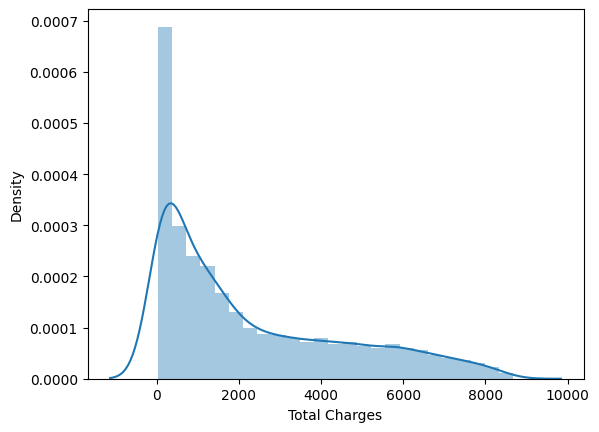

In [15]:
sns.distplot(data['Total Charges'])

/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/1347254506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Monthly Charges'], label = 'Monthly Charges')
/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/1347254506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

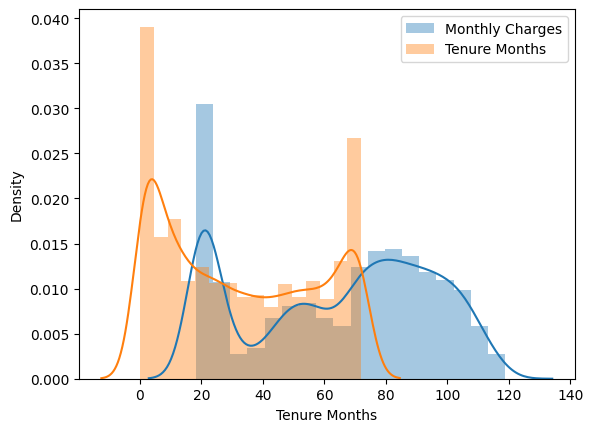

In [16]:

sns.distplot(data['Monthly Charges'], label = 'Monthly Charges')
sns.distplot(data['Tenure Months'], label = 'Tenure Months')
plt.legend()

#### **Pergunta**: O que podemos dizer quanto à semelhança da distribuição dessas duas variáveis? Apenas com a análise dos histogramas, podemos assumir que elas são equivalentes?

#### **Resposta**: Elas sao bastante semelhantes, visto que clientes que recém viram clientes provavelmente gastam mais e ao final do ciclo, a variavel tem um aumento antes de acabar o contrato. Elas possuem alguma correlacao, mais que ainda deve ser avaliada.

### Teste de Kolmogorov-Smirnov

O teste de Kolmogorov-Smirnov (KS) é uma técnica estatística utilizada para verificar a similaridade entre duas distribuições de dados ou para testar se uma amostra de dados segue uma determinada distribuição teórica. Ele é frequentemente usado para comparar uma distribuição de dados observados com uma distribuição teórica, como a distribuição normal. 

O teste KS calcula a diferença máxima entre as funções de distribuição acumulada (CDF) da amostra observada e da distribuição teórica. Se essa diferença, também chamada de estatística de teste, for menor que um valor crítico específico, podemos aceitar a hipótese nula de que a amostra segue a distribuição teórica.


![KS](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/KS_Example.png/300px-KS_Example.png)

Principais passos do teste:

1) Formulação das hipóteses:

 - Hipótese nula (H0): As duas amostras são extraídas da mesma distribuição.
 $$dist(\text{TC}) = dist(\hat{\text{TC}})$$
 - Hipótese alternativa (H1): As duas amostras não são extraídas da mesma distribuição. 
 $$dist(\text{TC}) \neq dist(\hat{\text{TC}})$$

2) Cálculo da estatística de teste:

  - As amostras são combinadas e ordenadas em ordem crescente.
  - Para cada valor ordenado, calcula-se a diferença entre as duas CDFs (linha azul e vermelha do gráfico).
  - A estatística de teste é a maior diferença absoluta encontrada (seta preta).

3) Determinação do valor crítico ou **p-valor**:

  - O valor crítico da estatística de teste depende do tamanho das amostras e do nível de significância desejado.
  - É possível consultar tabelas ou usar fórmulas específicas para encontrar o valor crítico.

4) Comparação e interpretação:

  - Se a estatística de teste for menor que o valor crítico, não há evidência suficiente para rejeitar a hipótese nula.
  - Se a estatística de teste for maior que o valor crítico, rejeita-se a hipótese nula em favor da hipótese alternativa, concluindo que as duas amostras têm distribuições diferentes.

Importante observar que o teste de Kolmogorov-Smirnov é aplicado para amostras de tamanho moderado a grande. Para amostras pequenas, existem correções específicas para garantir que o teste seja adequado.

#### **Tarefa**:  Realize o teste de Kolmogorov-Smirnov para verificar a verossimilhança da hipótese levantada de que as duas distribuições são iguais. Caso sejam, substitua "Total Charges" pela multiplicação dada acima. Use a função [ks_2samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) da biblioteca scipy stats para calcular o teste KS.

Você pode imputar na função diretamente os valores de cada coluna a ser estudada usando o *.values*

In [17]:
from scipy import stats

In [18]:
stats.ks_2samp(data['Total Charges'], data['Monthly Charges'])

KstestResult(statistic=0.8747692744569076, pvalue=0.0, statistic_location=117.8, statistic_sign=-1)

#### **Pergunta**: A partir da estatística e p-valor calculados pelo teste, podemos rejeitar a hipótese nula de que as distribuições são iguais?

#### **Resposta**: A partir do p-value = 0, nao ha evidencias para rejeitar a hipotese nula, entao, conclui-se que elas sao extraidas da mesma distribuicao.


#### **Tarefa**: Substitua total charges pela equação encontrada acima se o teste afirmar que as distribuições são iguais.

In [19]:
data['Total Charges'] = data['Total Charges'].fillna(data['Monthly Charges'] * data['Tenure Months'])

### Análise do target

O problema de detecção de churn é um clássico problema de classificação. Ele pode ser visto como um problema de classificação binária ou multiclasses. Geralmente utilizamos a classificação binária (2 classes) para churn. O principal ponto para a decisão entre tratar o problema como classificação binária (classe não churn e classe churn) ou multiclasse (ex: classe não-churn, classe churn tipo 1, classe churn tipo n) tem haver com a **quantidade de amostras** e o **balanceamento** entre as classes.

Para conseguir definir se no problema proposto o ideal é usar o cenário multiclasses ou o cenário binário, o ideal seria analisar, para cada proposta de target (binária ou multiclasse) como **cada uma das features está interagindo**. Neste projeto, para fins de simplificação, utilizaremos o caso **binário**. 




#### **Tarefa**: Calcule as frequências absoluta e relativa para a variável Churn Label.

As definições das duas frequências podem ser fácilmente encontras [aqui](https://pt.wikipedia.org/wiki/Frequ%C3%AAncia_(estat%C3%ADstica))

**Dica**: Utilize a função para dataframe [.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) para ambos os cálculos. No caso da frequência absoluta, sem nenhum tipo de parâmetro adicional, e para a frequência relativa, utilizando o parâmetro fixado normalize=True, que normaliza a contagem pela valor total.




In [20]:
data['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [21]:
data['Churn Label'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn Label, dtype: float64

#### **Tarefa**: Crie uma visualização com barras por categoria (histograma) para cada variável do target "Churn Label" que mostrem as frequências absoluta e relativa calculadas.

**Dica**: A função subplots do matplotlib permite que sejam criados multiplos plots na mesma figura. Esses plots podem ser feitos em vários subfiguras (subplots) ou embutidos em uma mesma figura, porém, com eixos verticais distintos (chamados de gêmeos ou *twins*)

[Exemplo usando a função subplots e twins](https://stackoverflow.com/questions/65400669/how-to-generate-two-separate-y-axes-for-a-histogram-on-the-same-figure-in-seabor)

**OBS**: Esse tipo de visualização será bastante utilizado neste case. Procure uma forma do código ser fácil de adaptar sem muito retrabalho.


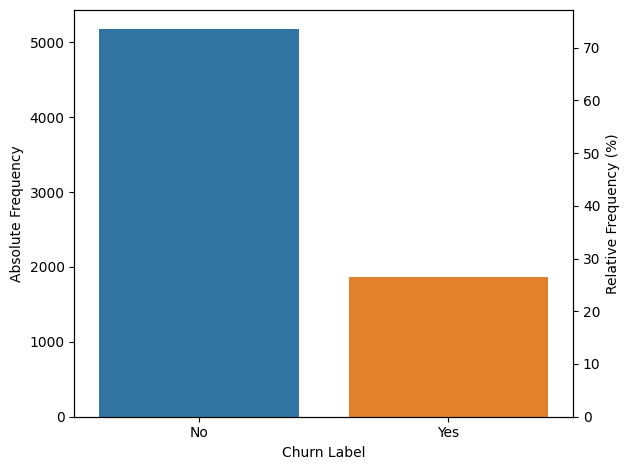

In [22]:
fig, ax = plt.subplots()

absolute_counts = data['Churn Label'].value_counts()
sns.countplot(x='Churn Label', data=data, order=absolute_counts.index, ax=ax)
ax.set_ylabel('Absolute Frequency')

ax2 = ax.twinx()
relative_counts = data['Churn Label'].value_counts(normalize=True)
relative_counts *= 100  # Convert to percentage
sns.barplot(x=relative_counts.index, y=relative_counts.values, order=absolute_counts.index, ax=ax2, alpha=0.5)
ax2.set_ylabel('Relative Frequency (%)')

plt.tight_layout()
plt.show()

#### **Pergunta:** A partir do gráfico, você diria que as classes estão balanceadas? Essa taxa é preocupante do ponto de vista da empresa?

#### **Resposta**: As classes estao desbalanceadas. Através do grafico acima, é possivel perceber que o numero de clientes em Churn é de aproximadamente 27%, enquanto nao churn alcança em torno de 73%. 

### Tempo de relacionamento: vamos analisar como o Tenure Month está relacionado com o target


#### **Tarefa**: Crie as visualizações dos histogramas da variável Tenure Months para ambas as classes da variável target Churn Label.

**Dica 1**: É possivel visualisar os 2 histogramas na mesma figura de forma sobreposta. Garanta que o histograma que contem menos pontos seja visualisado posteriormente ao com mais pontos (i.e. primeiro o plot do histograma com mais pontos, em seguida o outro),

**Dica 2**: Para ajudar o entendimento, utilizando subplots, visualize o boxplot de cada uma das distribuições utilizando a função da biblioteca seaborn [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/3870398408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Churn Label'] == 'Yes']['Tenure Months'], label = 'Churn = Yes')
/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/3870398408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

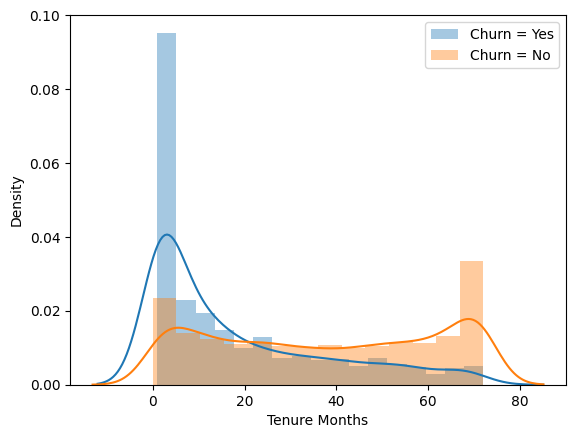

In [23]:
sns.distplot(data[data['Churn Label'] == 'Yes']['Tenure Months'], label = 'Churn = Yes')
sns.distplot(data[data['Churn Label'] == 'No']['Tenure Months'], label = 'Churn = No')
plt.legend()

#### **Pergunta:** Existe algum indicativo de como o tempo de relacionamento do cliente com a empresa afeta o probabilidade de churn?

#### **Resposta**: De acordo com o grafico, é possivel ver que pessoas em Churn = Yes possuem uma forte chance de dar Churn nos primeiros meses de contrato, assim, aparenta-se estar altamente correlacionada com o target.

#### **Tarefa**: Realize o teste de Kolmogorov comparando as duas distribuições do tempo de relacionamento condicionalmente às classes de churn.

In [24]:
stats.ks_2samp(data['Tenure Months'], data['Churn Value'])

KstestResult(statistic=0.911401391452506, pvalue=0.0, statistic_location=1, statistic_sign=-1)

#### **Pergunta:** O que podemos afirmar a partir do teste e das visualizações?

#### **Resposta**: p-value igual à zero, ou seja, nao ha evidencias para rejeitar a hipotese nula. Assim, essa variavel possui a mesma distribuicao da variavel target.


### Tipos de contrato: Vamos analisar como "Contract" se comporta com relação ao target

#### **Tarefa**: Crie plots com barras (histograma) por tipo de contrato por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações.

**Dica 1**: Use o mesmo template base feito anteriormente. É preferível e mais fácil que os plots das frequências absoluta e relativa sejam feitas em figuras separadas.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável churn label e poder calcular as frequências a partir das classes da variável Contract. Isso é o equivalente a calcular a probabilidade $P(\text{Contract}|\text{Churn Label} = \text{Yes})$ e $P(\text{Contract}|\text{Churn Label} = \text{No})$, ou seja, a probabilidade condicional do tipo de contrado sabendo o valor da variável churn.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Churn Label e as barras sejam o tipo de contrato.

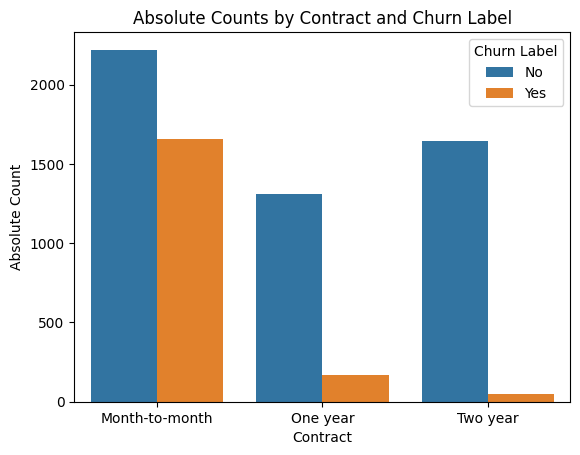

In [433]:
absolute_counts = data.groupby(['Churn Label', 'Contract'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})

absolute_counts['Relative Freq'] = absolute_counts['Absolute Count'] / len(data)

# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Contract', y='Absolute Count', hue='Churn Label', data=absolute_counts, ax=ax)
ax.set_title('Absolute Counts by Contract and Churn Label')
plt.show()


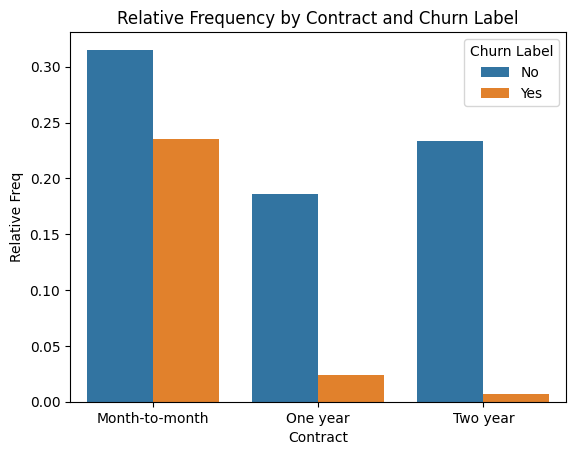

In [434]:
# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Contract', y='Relative Freq', hue='Churn Label', data=absolute_counts, ax=ax)
ax.set_title('Relative Frequency by Contract and Churn Label')
plt.show()

#### **Pergunta**: Existe algum tipo de contrato que seja mais propenso a ocorrer churn?

#### **Resposta**: Contratos mensais aparentam ter mais chance de dar churn se comparado aos demais.


### Cobrança mensal e total

Como vimos anteriormente, temos boas garantias para dizer que: $$\text{Total Charges} = \text{Monthly Charges} \cdot \text{Total Tenure}$$ 

Ja vimos a relação que temos de churn com Total Tenure.

#### **Pergunta:** Faz sentido investigar as duas variáveis Total Charges e Monthly Charges?

#### **Resposta:** Nao. Visto que elas sao extraidas da mesma distribuicao, os resultados da analise serao similares. Assim, podemos escolher apenas uma delas.


#### **Tarefa**: Crie as visualizações dos histogramas da variável Monthly Charges para ambas as classes da variável target Churn Label.

**Dica**: Use o mesmo padrão feito para a variável Tenure Months.

/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/459502052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Churn Label'] == 'Yes']['Monthly Charges'], label = 'Churn = Yes')
/var/folders/qr/_t3nsks152d7njyq9d_kcqx40000gn/T/ipykernel_2841/459502052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

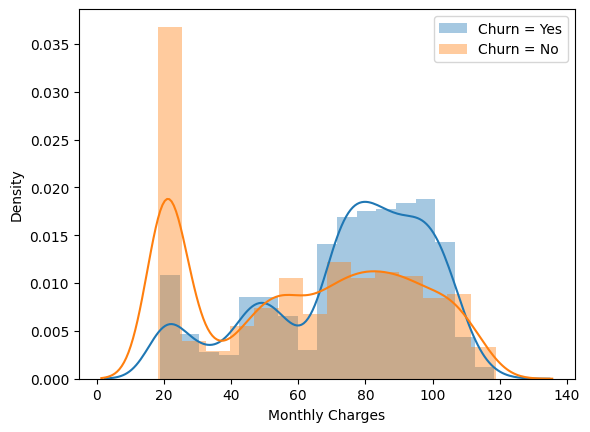

In [27]:
sns.distplot(data[data['Churn Label'] == 'Yes']['Monthly Charges'], label = 'Churn = Yes')
sns.distplot(data[data['Churn Label'] == 'No']['Monthly Charges'], label = 'Churn = No')
plt.legend()

#### **Tarefa**: Realize o teste de Kolmogorov comparando as duas distribuições da cobrança mensal condicionalmente às classes de churn.

In [28]:
stats.ks_2samp(data['Monthly Charges'], data['Churn Value'])

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)

#### **Pergunta**: Analisando as figuras e o teste de Kolmogorov, o que podemos concluir?

#### **Resposta**: Analisando o teste e as figuras, conclui-se que as variaveis estao altamente correlacionadas e sao extraidas da mesma distribuicao.


### Geolocalização

Procuraremos entender como conjunto de clientes está disperso geograficamente. E como essas variáveis se relacionam com a classe churn. 

Essas são as colunas que dão indicativo de geolocalização:

**'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'**

#### **Tarefa**: Calcule a frequência absoluta dos clientes para as variáveis Pais, Estado e Cidade.

**Dica**: Utilize a função *.groupby()* do pandas para agrupar os valores das tres variáveis e calcule as frequências absolutas utilizando a função *.count()* sobre a variável CustomerID

In [29]:
data['Country'].unique()

array(['United States'], dtype=object)

In [30]:
data['State'].unique()

array(['California'], dtype=object)

In [31]:
data['City'].nunique()

1129

In [32]:
data.groupby(['Country', 'State', 'City'])['CustomerID'].count()

Country        State       City        
United States  California  Acampo          4
                           Acton           4
                           Adelanto        5
                           Adin            4
                           Agoura Hills    5
                                          ..
                           Yreka           4
                           Yuba City       8
                           Yucaipa         4
                           Yucca Valley    5
                           Zenia           4
Name: CustomerID, Length: 1129, dtype: int64

In [86]:
df_cities = data.groupby(['Country', 'State', 'City'])['CustomerID'].count().reset_index().rename(columns={'CustomerID' : 'Freq'})

df_cities = pd.merge(df_cities, data[['Country', 'State', 'City', 'Latitude', 'Longitude']], on = ['Country', 'State', 'City'], how = 'left').drop_duplicates()

#### **Pergunta**: Quantos paises, estados e cidades estão presentes na base?

#### **Resposta**: O dataset contém dados dos Estados Unidos, do estado da California e de 1129 cidades.


#### **Tarefa**: Crie uma visualização no mapa da contagem de clientes por cidade.

**Dica**: Utilize a função [scatter_mapbox](https://plotly.com/python/scattermapbox/) da blioteca de visualização plotly express, que permite a criação dos mapas utilizando as variáveis do conjunto de dados Latitude e Logitude. Você pode utilizar diretamente o resultado das frequências absolutas na variável hover.

In [87]:
import plotly.express as px


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_cities, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Freq", 
                        hover_data=["Freq"],
                        color="Freq",
                        color_continuous_scale=color_scale,
                        zoom=4, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### **Pergunta:** Existe alguma cidade ou região com maior concentração de clientes?

#### **Resposta**: Sim, a cidade de Los Angeles possui a maior concentracao de clientes.

#### **Tarefa**: Crie um plot com barras (histograma) para cada uma das top 10 cidades com mais clientes mostrando as frequências absolutas e relativas ordenadas.

**Dica**: Use a mesma metodologia aplicada na análise das classes de churn.


In [88]:
data.groupby('City')['CustomerID'].count().sort_values(ascending=False)

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Hood               4
Hoopa              4
Hopland            4
Hornbrook          4
Zenia              4
Name: CustomerID, Length: 1129, dtype: int64

In [92]:
df_cities_plot = data.groupby('City')['CustomerID'].count().sort_values(ascending=False).reset_index().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'San Diego'),
  Text(2, 0, 'San Jose'),
  Text(3, 0, 'Sacramento'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'Fresno'),
  Text(6, 0, 'Long Beach'),
  Text(7, 0, 'Oakland'),
  Text(8, 0, 'Stockton'),
  Text(9, 0, 'Bakersfield')])

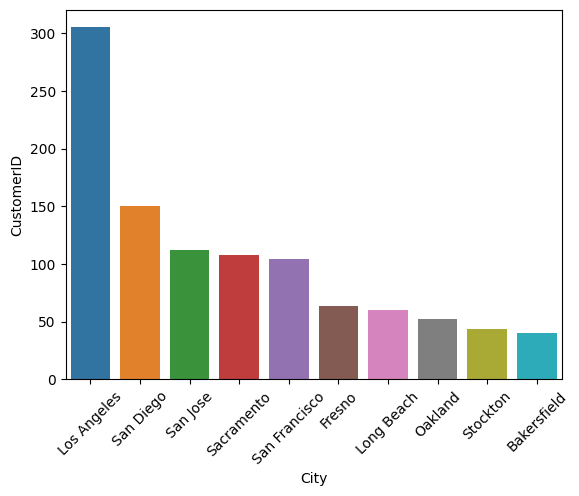

In [94]:
sns.barplot(x = 'City', y = 'CustomerID', data = df_cities_plot)
plt.xticks(rotation = 45)

#### **Pergunta**: Com essas visualizações, a distribuição de clientes está coerente com as populações gerais?
[Senso americano](https://en.wikipedia.org/wiki/List_of_largest_cities_in_California_by_population)

#### **Resposta**: Sim. Quando os dados sao comparados ao senso americano, é possivel ver que o maior numero de habitantes encontra-se entre as top 10 cidades analisadas. Dessa forma, é muito provavel que a maioria dos clientes estara proporcionalmente distribuida entre elas.


#### **Tarefa**: Crie uma visualização de dispersão para mostrar como a probabilidade de churn está relacionada a frequência absoluta de clientes para cada cidade.

**Dica 1**: Utilize a função *groupby* do pandas para agrupar cidades e aplique à coluna 'Churn Value' a função [.agg](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) para calcular tanto a frequência absoluta (usando *count*) quanto a probabilidade de churn (usando *mean*).

**Dica 2**: Utilize a função [.scatter](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py) do matplotlib para criar a visualização de dispersão.


In [95]:
df_cities_churn = data.groupby('City')['Churn Value'].agg(['count', 'mean']).reset_index().sort_values('count', ascending=False)

In [68]:
df_cities_churn

,City,count,mean
562,Los Angeles,305,0.295082
869,San Diego,150,0.333333
878,San Jose,112,0.258929
855,Sacramento,108,0.240741
872,San Francisco,104,0.298077
...,...,...,...
434,Hood,4,0.250000
435,Hoopa,4,0.250000
436,Hopland,4,0.250000
437,Hornbrook,4,0.250000


<AxesSubplot: xlabel='count', ylabel='mean'>

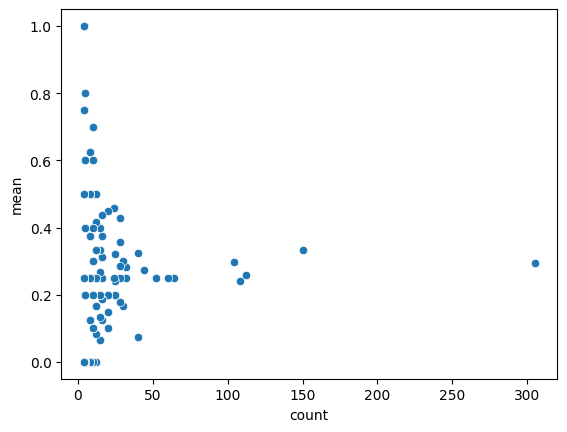

In [96]:
sns.scatterplot(x = 'count', y = 'mean', data = df_cities_churn)

#### **Pergunta:** Como está a distribuição de churn segundo essas cidades?

#### **Resposta:** A maioria dos pontos esta distribuido ao longo do eixo y (todos os valores de churn) até uma populacao de 100 pessoas. Entretanto, ha alguns pontos que deslocam à direita, evidenciando uma possivel correlacao positiva entre numero de clientes e taxa média de churn na cidade.

#### **Tarefa**: Crie uma visualização geográfica que mostre a probabilidade de churn para cada cidade.

**Dica 1:** Utilize apenas 1 variável Latitude e Longitude para cada cidade. Você pode escolher utilizando a função do pandas [.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) com a escolha do parâmetro subset sendo a variável Cidade.

**Dica 2** Crie um dataframe que seja a junção desse dataframe filtrado de Latitude e Longitude por cidade com o dataframe que você calculou as probabilidades de churn por cidade no exemplo acima. Utilize a função [.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) para tal junção.

**Dica 3** Crie o plot da mesma forma que anteriormente com a função scatter_mapbox, porém com a variável hover sendo essa probabilidade calculada.


In [97]:
df_cities = data.groupby(['Country', 'State', 'City'])['Churn Value'].mean().reset_index()
df_cities = pd.merge(df_cities, data[['Country', 'State', 'City', 'Latitude', 'Longitude']], on = ['Country', 'State', 'City'], how = 'left').drop_duplicates()

In [98]:
import plotly.express as px


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_cities, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Churn Value", 
                        hover_data=["Churn Value"],
                        color="Churn Value",
                        color_continuous_scale=color_scale,
                        zoom=4, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### **Pergunta** Conseguimos identificar algum padrão para a probabilidade de churn que indique fator geográfico relevante?

#### **Resposta**: Algumas possiveis analises poderiam ser feitas:
- Analisar a populacao e o numero de clientes
- Analisar se a cidade esta mais ao sul ou ao norte da regiao
- Analisar as caracteristicas climaticas de cada cidade

Basicamente, o que pode ser feito é usar estatisticas descritivas dos fatores geograficos de cada cidade/regiao e assim fazer uma correlacao com a variavel de churn para encontrar esse padrao.


### Tipos de serviço

Iremos analisar como os tipos de serviço impactam o churn dos consumidores.

Na base de dados temos as seguintes colunas:

**'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV', 'Streaming Movies'**



#### **Pergunta:** Podemos usar a correlação de pearson para calcular a relação entre essas variáveis e a variável target?


#### **Resposta:** Nao, pois elas sao variaveis categorica do tipo Sim ou Nao. Assim, deve-se usar um teste especifico, como Chi2.


### Medindo relacionamento entre variáveis categóricas não-ordinais.

Existem algumas formas para medir a relação entre variáveis categóricas não-ordinais, ou que não tenham nenhuma relação de ordem entre sí. Duas maneiras usuais de utilizar algumas medidas estatísticas específicas para esse tipo de dados são: o coeficiente de contingência e o teste qui-quadrado (chi-quadrado).

 - [**Teste qui-quadrado (chi-quadrado)**](https://pt.wikipedia.org/wiki/Teste_qui-quadrado_de_Pearson): O teste qui-quadrado é um teste estatístico que avalia a associação entre duas variáveis categóricas, comparando as frequências observadas com as frequências esperadas, assumindo que não há associação. Se o valor-p (p-value) do teste qui-quadrado for menor que um nível de significância pré-definido (geralmente 0,05), então rejeita-se a hipótese nula de não associação, o que indica que há uma correlação significativa entre as variáveis.


 - [**Coeficiente de Contingência:**](https://pt.wikipedia.org/wiki/Coeficiente_de_conting%C3%AAncia) O coeficiente de contingência (ou Cramér's V) é uma medida que varia entre 0 e 1, onde 0 significa nenhuma associação entre as variáveis categóricas e 1 indica uma associação perfeita. Quanto mais próximo de 1, maior é a correlação entre as variáveis.

Neste projeto, utilizaremos o **teste qui-quadrado**.


#### **Tarefa**: Primeiro, copie seu dataframe original, mantendo apenas as colunas dos tipos de serviço

In [101]:
data_services = data[['Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV', 'Streaming Movies']].copy()

In [105]:
data_services['Churn Value'] = data['Churn Value'].values.tolist()

#### **Tarefa**:  Construa a [tabela de contingência](https://pt.wikipedia.org/wiki/Tabela_de_conting%C3%AAncia) entre o Churn Label e uma variável dos tipos de serviço (por exemplo, "Phone Service"). Utlize a função do pandas [pd.crosstab](https://www.statology.org/contingency-table-python/).

In [108]:
contingency_service = pd.crosstab(index=data_services['Phone Service'], columns=data_services['Churn Value'])
contingency_service

Churn Value,0,1
Phone Service,,
No,512,170
Yes,4662,1699


#### **Tarefa**: Calcule o teste de Qui-quadrado utilizando a função [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) da biblioteca scipy.stats, passando como parâmetro a tabela de contingência.

In [107]:
from scipy.stats import chi2_contingency


In [109]:
chi2_contingency(contingency_service)

Chi2ContingencyResult(statistic=0.9150329892546948, pvalue=0.3387825358066928, dof=1, expected_freq=array([[ 501.01774812,  180.98225188],
       [4672.98225188, 1688.01774812]]))

#### **Tarefa**: Repita esse processo para todas as colunas. Você pode incluir o processo em um loop for se preferir.

In [115]:
relevant_values = []
for col in data_services.columns[:-1]:
    contingency_service = pd.crosstab(index=data_services[col], columns=data_services['Churn Value'])
    res = chi2_contingency(contingency_service)
    print(col, res)

    if res.pvalue < 0.05:
        relevant_values.append((col, res.pvalue))



print('Relevant Columns:')
print(relevant_values)

Phone Service Chi2ContingencyResult(statistic=0.9150329892546948, pvalue=0.3387825358066928, dof=1, expected_freq=array([[ 501.01774812,  180.98225188],
       [4672.98225188, 1688.01774812]]))
Multiple Lines Chi2ContingencyResult(statistic=11.33044148319756, pvalue=0.0034643829548773, dof=2, expected_freq=array([[2490.39613801,  899.60386199],
       [ 501.01774812,  180.98225188],
       [2182.58611387,  788.41388613]]))
Internet Service Chi2ContingencyResult(statistic=732.309589667794, pvalue=9.571788222840544e-160, dof=2, expected_freq=array([[1778.53954281,  642.46045719],
       [2274.41488002,  821.58511998],
       [1121.04557717,  404.95442283]]))
Online Security Chi2ContingencyResult(statistic=849.9989679615965, pvalue=2.661149635176552e-185, dof=2, expected_freq=array([[2569.73619196,  928.26380804],
       [1121.04557717,  404.95442283],
       [1483.21823087,  535.78176913]]))
Online Backup Chi2ContingencyResult(statistic=601.812790113409, pvalue=2.0797592160864276e-131, d

#### **Pergunta**: Quais são os 3 tipos de serviço mais relacionados com a variável target? Existe algum que não tenha relação nenhuma?

#### **Resposta**: Os tipos de serviços mais relacionados com a variavel target sao: Multiple Lines, Streaming TV and Streaming Movies, pois sao aqueles com o menor p-valor. O servico que possui uma significancia nao conclusiva em relacao ao target é Phone Service, com o p-valor de 0.33.


### Servicos de Internet

#### **Tarefa**: Crie um plot com barras (histograma) por categoria da variável *Internet Service* mostrando as frequências absolutas e relativas ordenadas.

**Dica**: Utilize a mesma metodologia aplicada às classes de chunr.

<AxesSubplot: xlabel='Internet Service', ylabel='count'>

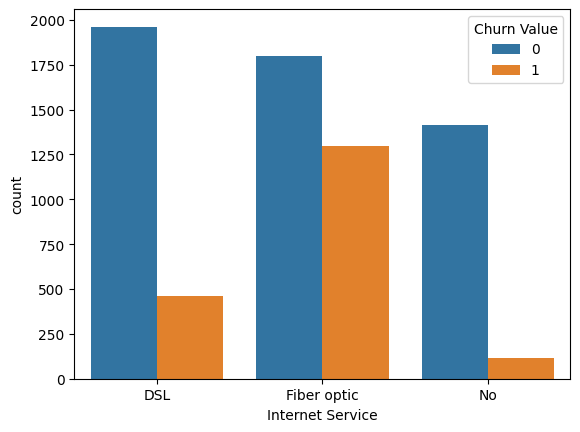

In [122]:
sns.countplot(x = data['Internet Service'], hue = data['Churn Value'])

A maioria das pessoas possuem serviço de fibra optica. Também, a proporcao de pessoas que dao churn é maior para esse servico quando comparado ao DSL ou à nao ter um servico de internet.

#### **Tarefa**: Crie plots com barras (histograma) por categoria da variável *Internet Service* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações.

**Dica 1**: Use o mesmo template base feito anteriormente para a variável tipo de contrato.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável churn label e poder calcular as frequências a partir das classes da variável Internet Service. Isso é o equivalente a calcular a probabilidade $P(\text{Internet Service}|\text{Churn Label} = \text{Yes})$ e $P(\text{Internet Service}|\text{Churn Label} = \text{No})$, ou seja, a probabilidade condicional do tipo de serviço de internet sabendo o valor da variável churn.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Churn Label e as barras sejam os tipos de serviço de internet.

In [129]:
data_aux = data.groupby(['Churn Label', 'Internet Service'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Churn Label', columns = 'Internet Service', values = 'Absolute Count').reset_index()


Internet Service,Churn Label,DSL,Fiber optic,No
0,No,1962,1799,1413
1,Yes,459,1297,113


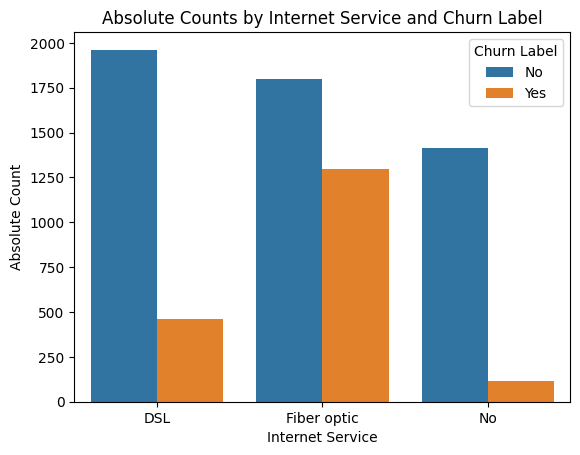

In [132]:
absolute_counts = data.groupby(['Churn Label', 'Internet Service'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})

absolute_counts['Relative Freq'] = absolute_counts['Absolute Count'] / len(data)

# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Internet Service', y='Absolute Count', hue='Churn Label', data=absolute_counts, ax=ax)
ax.set_title('Absolute Counts by Internet Service and Churn Label')
plt.show()


#### **Tarefa**: Crie plots com barras (histograma) por categoria da variável *Internet Service* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo os tipos de Internet Service.

**Dica 1**: Use o mesmo template base feito acima.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar a variável Internet Service e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL})$, $P(\text{Churn Label} | \text{Internet Service} = \text{Fiber optic})$, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service..

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes da variável Internet Services e as barras sejam as classes da variável Churn Label.

In [148]:
data_aux = data.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Internet Service', columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Internet Service,No,Yes,No_rel,Yes_rel
0,DSL,1962,459,0.810409,0.189591
1,Fiber optic,1799,1297,0.581072,0.418928
2,No,1413,113,0.925950,0.074050


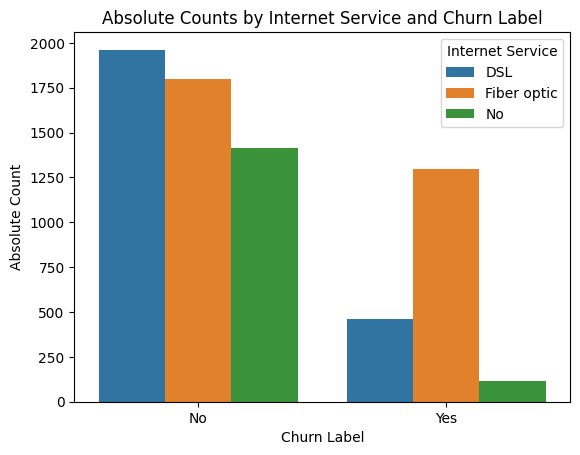

In [136]:
absolute_counts = data.groupby(['Churn Label', 'Internet Service'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})

absolute_counts['Relative Freq'] = absolute_counts['Absolute Count'] / len(data)

# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Churn Label', y='Absolute Count', hue='Internet Service', data=absolute_counts, ax=ax)
ax.set_title('Absolute Counts by Internet Service and Churn Label')
plt.show()


#### **Pergunta:** Existe alguma predileção por serviços de internet para clientes que tem mais propensão ao churn?

#### **Resposta**: Sim. Fibra optica possui maior propensao dos clientes à darem Churn, seguido um pouco de longe de DSL. 


### Tech Support

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Tech Support* e a target *Churn Label*

In [147]:
data_aux = data.groupby(['Churn Label', 'Tech Support'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Churn Label', columns = 'Tech Support', values = 'Absolute Count').reset_index()
data_pivot

Tech Support,Churn Label,No,No internet service,Yes
0,No,2027,1413,1734
1,Yes,1446,113,310


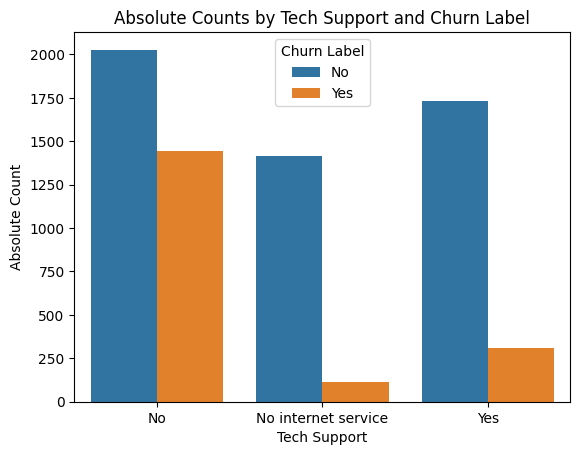

In [140]:
absolute_counts = data.groupby(['Churn Label', 'Tech Support'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})

absolute_counts['Relative Freq'] = absolute_counts['Absolute Count'] / len(data)

# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Tech Support', y='Absolute Count', hue='Churn Label', data=absolute_counts, ax=ax)
ax.set_title('Absolute Counts by Tech Support and Churn Label')
plt.show()


In [145]:
data_aux = data.groupby(['Tech Support', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Tech Support', columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Tech Support,No,Yes,No_rel,Yes_rel
0,No,2027,1446,0.583645,0.416355
1,No internet service,1413,113,0.925950,0.074050
2,Yes,1734,310,0.848337,0.151663


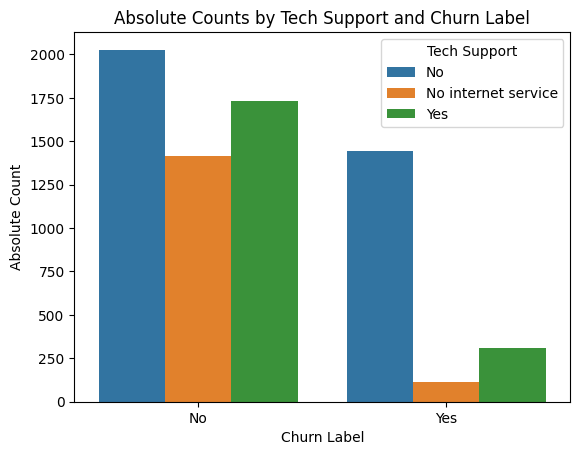

In [142]:
absolute_counts = data.groupby(['Churn Label', 'Tech Support'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})

absolute_counts['Relative Freq'] = absolute_counts['Absolute Count'] / len(data)

# Plot absolute counts
fig, ax = plt.subplots()
sns.barplot(x='Churn Label', y='Absolute Count', hue='Tech Support', data=absolute_counts, ax=ax)
ax.set_title('Absolute Counts by Tech Support and Churn Label')
plt.show()


#### **Pergunta**: O que podemos observar da relação entre as variáveis *Tech Support* e da variável target *Churn Label*?

#### **Resposta**: Através do Grafico, pode-se observar que clientes que nao possuem suporte tecnico sao aqueles que tem maior propensao ao Churn, sendo uma variavel bastante impactante no target.

#### **Tarefa**: Crie plots com barras (histograma) por categoria da variáveis *Internet Service*,*Tech Support* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo a combinação entre os tipos de *Internet Service* e *Tech Support*.

**Dica 1**: Use o mesmo template base feito para as variáveis acima.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar as variáveis ['Internet Service','Tech Support'] e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL}, \text{Tech Support} = \text{Yes})$, por exemplo, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service e da variável Tech Support.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes das variáveis ['Internet Service','Tech Support'] e as barras sejam as classes da variável Churn Label.

In [144]:
data_aux = data.groupby(['Tech Support', 'Internet Service', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = ['Internet Service', 'Tech Support'], columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Internet Service,Tech Support,No,Yes,No_rel,Yes_rel
0,DSL,No,898,345,0.722446,0.277554
1,DSL,Yes,1064,114,0.903226,0.096774
2,Fiber optic,No,1129,1101,0.506278,0.493722
3,Fiber optic,Yes,670,196,0.773672,0.226328
4,No,No internet service,1413,113,0.925950,0.074050


#### **Pergunta**: Como o relacionamento entre as 2 variáveis *Internet Service* e *Tech Support* interferem na probabilidade de churn?

#### **Resposta**: Quando temos uma probabilidade de churn condicionada à servicos de internet e suporte tecnico, fica evidente que pessoas que possuem fibra optica e nao possuem suporte técnico possuem maior chance de dar churn. Ambas variaveis quando analisadas separadamente, quando analisada a amostra, em torno de 41% dao churn. Quando essas categorias sao analisadas juntas, essa proporcao aumenta para quase 50%, mostrando que ha uma correlacao positiva e isso tambem acaba sendo um possivel insight de melhora do sistema.


### Segurança Online

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Online Security* e a taget *Churn Label*

In [149]:
data_aux = data.groupby(['Online Security', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Online Security', columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Online Security,No,Yes,No_rel,Yes_rel
0,No,2037,1461,0.582333,0.417667
1,No internet service,1413,113,0.925950,0.074050
2,Yes,1724,295,0.853888,0.146112


#### **Pergunta**: O que podemos entender da relação entre *Online Security* e *Churn Label*? 

#### **Resposta**: Pessoas que nao possuem protecao na internet tambem estao mais pre-dispostas à dar churn segundo à amostra analisada.


### Tipo de pagamento

#### **Tarefa**: Realize as mesmas análises feitas para a variável *Internet Service*, agora considerando a variável *Payment Method* e a taget *Churn Label*

In [150]:
data_aux = data.groupby(['Payment Method', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = 'Payment Method', columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Payment Method,No,Yes,No_rel,Yes_rel
0,Bank transfer (automatic),1286,258,0.832902,0.167098
1,Credit card (automatic),1290,232,0.847569,0.152431
2,Electronic check,1294,1071,0.547146,0.452854
3,Mailed check,1304,308,0.808933,0.191067


#### **Pergunta**: Como se dá a relação entre as variáveis *Payment Method* e *Churn Label*?

#### **Resposta**: Analisando as variaveis de pagamento, clientes que possuem o pagamento como Eletronic check estao mais propensos à dar churn, seguido de Mailed check, mas ainda assim de longe.


#### **Tarefa**: Crie plots com barras (histograma) por categoria da variáveis *Internet Service*,*Payment Method* e por categoria da coluna Churn Label representando as frequências absolutas e relativas de cada uma das combinações, porém, considerando o eixo X como sendo a combinação entre os tipos de *Internet Service* e *Payment Method*.

**Dica 1**: Use o mesmo template base feito na análise de Tech Support e Internet Services.

**Dica 2**: Utilize a função 
[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do pandas para agrupar as variáveis ['Internet Service','Payment Method'] e poder calcular as frequências a partir das classes da variável Churn Label. Isso é o equivalente a calcular a probabilidade $P(\text{Churn Label} | \text{Internet Service} = \text{DSL}, \text{Payment Method} = \text{Electronic check})$, por exemplo, ou seja, a probabilidade condicional do churn sabendo o valor da variável Internet Service e da variável Payment Method.

**Dica 3**: Utilize a função [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) do pandas para ajustar a tabela para que o eixo x da visualização corresponda às classes das variáveis ['Internet Service','Payment Method] e as barras sejam as classes da variável Churn Label.

In [154]:
data_aux = data.groupby(['Payment Method', 'Internet Service', 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = ['Payment Method', 'Internet Service'], columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot.sort_values('Yes_rel', ascending=False)

Churn Label,Payment Method,Internet Service,No,Yes,No_rel,Yes_rel
7,Electronic check,Fiber optic,746,849,0.467712,0.532288
10,Mailed check,Fiber optic,148,110,0.573643,0.426357
6,Electronic check,DSL,441,207,0.680556,0.319444
1,Bank transfer (automatic),Fiber optic,459,187,0.710526,0.289474
4,Credit card (automatic),Fiber optic,446,151,0.747069,0.252931
9,Mailed check,DSL,486,127,0.792822,0.207178
8,Electronic check,No,107,15,0.877049,0.122951
3,Credit card (automatic),DSL,522,72,0.878788,0.121212
11,Mailed check,No,670,71,0.904184,0.095816
0,Bank transfer (automatic),DSL,513,53,0.906360,0.093640


#### **Pergunta** Como está a relação entre as três variáveis? O que podemos inferir exclusivamente da combinação Fibra-Otica e Electronic check?

#### **Resposta**: Todos os pagamentos via cheque sao altamente preditivos para prever se um cliente vai dar churn ou nao. Quando analisamos a combinacao fibra optica e electronic check, é possivel ver que mais clientes dao churn do que sao retidos como cliente. Assim, ela torna-se extremamente importante para o modelo de machine learning.


### Variáveis de Cliente

Iremos analisar como os as variáveis de cliente impactam o churn dos consumidores.

Na base de dados temos as seguintes colunas:

**'Gender','Senior Citizen','Partner','Dependents'**

#### **Tarefa**: Faça as mesmas análises que você fez para os tipos de serviço para cada categoria

In [155]:
var = 'Gender'

data_aux = data.groupby([var, 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = var, columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Gender,No,Yes,No_rel,Yes_rel
0,Female,2549,939,0.730791,0.269209
1,Male,2625,930,0.738397,0.261603


In [157]:
var = 'Senior Citizen'

data_aux = data.groupby([var, 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = var, columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Senior Citizen,No,Yes,No_rel,Yes_rel
0,No,4508,1393,0.763938,0.236062
1,Yes,666,476,0.583187,0.416813


In [158]:
var = 'Partner'

data_aux = data.groupby([var, 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = var, columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Partner,No,Yes,No_rel,Yes_rel
0,No,2441,1200,0.670420,0.329580
1,Yes,2733,669,0.803351,0.196649


In [159]:
var = 'Dependents'

data_aux = data.groupby([var, 'Churn Label'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Absolute Count'})
data_pivot = pd.pivot_table(data_aux, index = var, columns = 'Churn Label', values = 'Absolute Count').reset_index()
data_pivot['No_rel'] = data_pivot['No']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot['Yes_rel'] = data_pivot['Yes']/(data_pivot['No'] + data_pivot['Yes'])
data_pivot

Churn Label,Dependents,No,Yes,No_rel,Yes_rel
0,No,3653,1763,0.674483,0.325517
1,Yes,1521,106,0.934849,0.065151


Através da analise acima, é possivel ver marcar como possiveis variaveis interessantes: Cliente é Senior Citizen. O resto apresenta pouco impacto na variavel churn.

## Preparação de dados para modelagem

Vimos anteriormente que várias variáveis influenciam na probabilidade de churn. Iremos inciar aqui nessa sessão a seleção e a preparação de dados para a modelagem.

#### **Tarefa**: Crie um dataset que seleciona apenas as colunas que iremos utilizar na modelagem considerando também uma coluna para a variável target.

**Dica 1**: Utilize o conhecimento que você adquiriu durante a análise de dados para escolher as colunas que tenham potencial de relação com o target.

**Dica 2**: Cuidado com o numero elevado de colunas. Quanto mais colunas, mais são necessárias amostra para o modelo ter uma performance adequada.

**Dica 3**: Em um primeiro momento, prefira não envolver dados de geolocalização. A menos que você tenha descoberto alguma relação entre as variáveis ou entre alguma transformação delas.

In [316]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [436]:
features = ['Senior Citizen', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',  'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Monthly Charges', 'Tenure Months']

In [437]:
for col in features:
    print(col, data[col].nunique())

Senior Citizen 2
Multiple Lines 3
Internet Service 3
Online Security 3
Online Backup 3
Device Protection 3
Tech Support 3
Streaming TV 3
Streaming Movies 3
Contract 3
Payment Method 4
Monthly Charges 1585
Tenure Months 73


In [438]:
target = 'Churn Value'

#### **Tarefa**: Crie dois dataframes separados, um contendo apenas as variáveis categóricas e o outro contendo as demais colunas.

**Dica 1**: A função do pandas [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) pode ser útil para definir as colunas não-categóricas.

**Dica 2**: Existe uma coluna no dataset que já considera o target como sendo numérico, portando de preferência para escolha dessa coluna como target

In [439]:
feat_num = data[features].select_dtypes(exclude='object')
feat_cat = data[features].select_dtypes(include='object')

#### **Tarefa**: Crie suas variáveis X e y, onde X são as features do seu modelo e y a target. Depois, separe um conjunto de TESTE usando a amostragem de retenção para que possamos fazer uma "simulação da realidade" com dados não-vistos. Você pode usar a função [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do sklearn e um tamanho de dataset de teste de 20%.

**Dica**: Lembre-se que nosso dataset é extremamente desbalanceado, por isso, é importante "estratificar", ou seja, garantir que temos a mesma proporção de target tanto no subconjunto de treino, quando de teste. Para isso, você pode parametrizar o atributo de entrada da função train_test_split com *stratify=y*, sendo y sua target.

In [440]:
from sklearn.model_selection import train_test_split

In [441]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.33, stratify=data[target], random_state=42)

In [442]:
from feature_engine.encoding import OneHotEncoder, WoEEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [443]:
# Features to conver to ordinal encoding
categorical_features = feat_cat.columns.tolist()


# Categorical transformations
categorical_transformer = Pipeline(
    steps=[
        ("woe", WoEEncoder())
]
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough'
    
)

## Modelo de previsão do churn

Neste projeto, vamos lidar com o problema de churn, construindo um modelo de classificação binária. O modelo utilizado será o XGBoost. O XGBoost é um modelo que necessita da estimação de diversos hiperparâmetros e, por isso, vamos implementar uma busca em grade ou *grid-search*.

O Grid Search é uma técnica utilizada para encontrar a melhor combinação de hiperparâmetros para um modelo de aprendizado de máquina. Esses hiperparâmetros são valores ajustáveis que não são aprendidos pelo modelo durante o treinamento, mas que podem influenciar significativamente sua performance. O Grid Search realiza uma busca exaustiva em um espaço **pré-definido** de hiperparâmetros, combinando todas as possíveis combinações e avaliando o desempenho do modelo com cada uma delas. Para cada combinação de hiperparâmetros, o Grid Search utiliza uma **estratégia de validação cruzada** para avaliar a performance do modelo de forma mais robusta. Ao final da busca, o Grid Search retorna a combinação de hiperparâmetros que resultou no melhor desempenho, permitindo assim que o modelo seja configurado de maneira ótima para a tarefa em questão.

Todos os conceitos necessários para completarmos a tarefa são descritos abaixo.

### Protocolos de validação

Existem várias técnicas de validação que podem ser utilizadas para avaliar o desempenho de modelos de aprendizado de máquina. Em grandes linhas, podemos destacar as seguintes:


- **Amostragem de retenção (*Hold-out*)**:
    O hold-out é uma das abordagens mais simples e populares para dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. Nesta técnica, você reserva uma parte dos dados (por exemplo, 70-80%) para treinar o modelo e a outra parte (por exemplo, 30-20%) para testá-lo. Apesar de sua simplicidade, essa técnica pode ser propensa a variações nos resultados, dependendo de como os dados são divididos. A escolha aleatória das amostras pode levar a resultados variáveis, o que pode não ser uma estimativa precisa do desempenho geral do modelo. Isso acontece especialmente quando o conjunto de dados é pequeno ou quando há desequilíbrio entre as classes (em problemas de classificação). Porém, para conjuntos de dados com alto volume de amostras, essas variações são mitigadas além de fornecer um processamento mais rápido que em outras técnicas.
     
 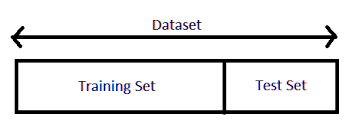

- **Validação Cruzada (*Cross-Validation*)**:
    A validação cruzada é uma técnica mais sofisticada que ajuda a obter estimativas mais estáveis do desempenho do modelo. Existem várias formas de validação cruzada, sendo a validação cruzada k-fold a mais comum. Nessa abordagem, o conjunto de dados é dividido em k partes (dobras) de tamanho igual. O modelo é treinado k vezes, cada vez usando k-1 dobras como conjunto de treinamento e a dobra restante como conjunto de teste. Ao final das k iterações, os resultados de desempenho do modelo (por exemplo, métricas de avaliação) são agregados e geralmente são calculadas médias ou medianas para fornecer uma estimativa mais precisa do desempenho geral do modelo. 
    A validação cruzada é especialmente útil quando o tamanho do conjunto de dados é limitado ou quando há uma distribuição desigual de classes, pois permite que todas as amostras contribuam tanto para o treinamento quanto para a avaliação do modelo, reduzindo assim o impacto de variações na divisão dos dados. Ao usar técnicas de validação cruzada, é importante ter em mente que a estimativa do desempenho do modelo pode depender da escolha de k. Geralmente, valores comuns para k são 5 ou 10, mas em casos de conjuntos de dados muito pequenos, o LOOCV (Leave-One-Out Cross-Validation) pode ser considerado, onde cada amostra é usada como conjunto de teste uma vez, enquanto todas as outras amostras são usadas para treinar o modelo. O LOOCV fornece uma estimativa não enviesada do desempenho do modelo, mas pode ser computacionalmente mais intensivo.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="crossval" width="40%">


### Validação Cruzada Estratificada 

Para a validação no treino, utilizaremos avalidação cruzada. Dado o tamanho do conjunto de dados, a estratégia Leavo-One-Out parece não ser uma boa escolha pelo tempo de processamento necessário. Poderíamos então utilizar a K-fold cross validation? Talvez não seja a melhor opçãopor termos classes **desbalanceadas**. Numa amostragem aleatória, temos muita chance de ter um resultado ruidoso devido a falta de amostras da classe minoritária nos folds de treinamento. Uma forma de trazer robustez a saída é utilizando a **Validação Cruzada Estratificada**.

A Validação Cruzada Estratificada ([StratifiedKFold no sklearn](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)) é uma técnica de validação cruzada que divide o conjunto de dados em k partes (dobras) de forma estratificada, preservando a proporção de classes em cada subconjunto. É especialmente útil quando se tem classes desequilibradas, garantindo que cada subconjunto tenha uma distribuição similar de classes. Geralmente, o StratifiedKFold é utilizado uma única vez para dividir o conjunto de dados em k subconjuntos e treinar/testar o modelo em cada uma delas.

![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png)

Indo além, contamos também com a possibilidade de utilizar a Validação Cruzada Estratificada Repetida ([RepeatedStratifiedKFold do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold)) que é uma extensão do StratifiedKFold que repete a validação cruzada estratificada múltiplas vezes para melhorar a robustez das estimativas de desempenho do modelo. Além de dividir o conjunto de dados em k partes estratificadas, ele repete esse processo n vezes, gerando diferentes divisões aleatórias dos dados em cada repetição. A repetição é útil quando o conjunto de dados é relativamente pequeno ou quando se deseja obter uma estimativa mais estável e confiável do desempenho do modelo, levando em conta a variabilidade decorrente da aleatoriedade das divisões dos dados.


Para o nosso problema utilizaremos a forma não repetida, devido aos tempos de treinamento e o caráter didático. Porém, se quiserem testar a com repetição, fiquem à vontade. E, por favor, comentem sobre os resultados conosco.

#### **Tarefa**: Defina um objeto com a validação cruzada. Esse objeto será utilizado mais à frente.

[StratifiedKfold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)

**Dica**: Aplique 4 splits e use shuffle=True. Caso queira ter resultados replicáveis, fixe um random_state qualquer.

In [444]:
from sklearn.model_selection import StratifiedKFold

In [445]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


#### **Pergunta**: Como podemos resolver o problema de desbalanceamento das classes?

#### **Resposta:** Existem diversas maneiras de resolver o balanceamento de classes. As mais conhecidas sao as que alteram a distribuicao dos dados de treinamento, ou seja, Undersampling, Oversampling e SMOTE e as que penalizam as classes erradas na funcao de custo. 

### Técnicas para tratar o desbalanceamento

Uma das principais estratégias para lidar com o desbalanceamento de classes é a reamostragem do conjunto de treinamento. Na reamostragem, podemos aplicar o *undersampling* e o *oversampling*. 
- *Undersampling* ou subamostragem: remoção estratégica de amostras da classe majoritária para reduzir o viés em direção a essa classe.
- *Oversampling*: aumento de amostras da classe minoritária. Uma eficiente técnica de oversampling é o SMOTE (Synthetic Minority Over-sampling Technique), que cria amostras sintéticas da classe minoritária para equilibrar as proporções das classes. Ele utiliza uma abordagem similar à do KNN.

![smote](https://www.researchgate.net/publication/347937180/figure/fig3/AS:973429209563136@1609095017080/Illustration-of-the-SMOTE-oversampling-approach.ppm)

Outra abordagem eficaz é o uso de **modelos ensemble**, como Random Forest, Gradient Boosting e XGBoost. Esses modelos têm a capacidade de combinar as previsões de vários classificadores, reduzindo o impacto do desequilíbrio e fornecendo uma classificação mais robusta. Os modelos ensemble também podem ser menos sensíveis aos problemas causados pelo desbalanceamento, tornando-os uma opção valiosa.

Para lidar com a questão do peso das features, podemos aplicar técnicas de seleção de features. A seleção adequada das características mais relevantes para o problema pode ajudar a melhorar a representatividade do conjunto de dados e, consequentemente, a eficácia do modelo.

Outra estratégia importante é ajustar os pesos das classes durante o treinamento do modelo. **Atribuir maior peso à classe minoritária** faz com que o modelo dê mais importância a ela durante o aprendizado, ajudando a corrigir o viés em direção à classe majoritária.


No nosso problema, iremos utilizar algumas delas: o **SMOTE**, o modelo **XGBOOST** e adicionar à pesquisa de hiperparâmetros, com GridSearch, **pesos para classe minoritária** (parâmetro scale_pos_weight do XGBOOST).


### XGBOOST

O XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina que utiliza a técnica de gradient boosting para construir modelos de alta precisão. Vamos explicar o funcionamento do XGBoost em um passo a passo simples:

1. Inicialização dos pesos: O processo começa atribuindo pesos iguais a todas as instâncias de treinamento. Esses pesos são usados para dar mais importância às instâncias que foram classificadas incorretamente nas etapas anteriores.

2. Etapas iterativas: O XGBoost cria árvores de decisão em etapas iterativas. Em cada iteração, uma nova árvore é adicionada ao modelo para corrigir os erros cometidos pelas árvores anteriores.

3. Cálculo do gradiente e hessiano: Para cada instância de treinamento, o XGBoost calcula o gradiente e o hessiano da função de perda, que medem a direção e a magnitude do erro em relação à previsão atual.

4. Construção da árvore: Com base nos gradientes e hessianos calculados, o XGBoost constrói uma árvore de decisão para minimizar a função de perda. Essa árvore é adicionada ao modelo.

5. Regularização: O XGBoost utiliza técnicas de regularização, como penalização L1 e L2, para evitar overfitting e melhorar a generalização do modelo.

6. Atualização dos pesos: Após a construção da árvore, os pesos das instâncias de treinamento são atualizados com base nos erros cometidos pela nova árvore.

7. Atualização do modelo: O processo de construção de árvores e atualização de pesos é repetido várias vezes (número de iterações definido pelo usuário) para criar um modelo final que combina as previsões de todas as árvores.

![xgboost](https://miro.medium.com/v2/resize:fit:560/1*85QHtH-49U7ozPpmA5cAaw.png)

O XGBoost é conhecido por sua eficiência e precisão em problemas de classificação e regressão. Ele é amplamente utilizado em competições de ciência de dados e é uma das bibliotecas de machine learning mais populares. Sua flexibilidade, recursos de regularização (imploementação interna de normas l1 e l2) e capacidade de lidar com grandes conjuntos de dados (possibilidade de processamento paralelo) tornam-no uma escolha poderosa para muitas tarefas de aprendizado de máquina. É importante destacar que o XGBoost tem uma maneira interna eficiente de tratar dados faltantes e, portanto, você pode colocar NaNs em sua entrada.

#### **Tarefa**: Complete o estimador abaixo com a função objetiva correta. Lembre-se que temos um problema de classificação binária.

**Dica**: Dentre as funções objetivas possíveis para classificações binárias, a mais comumente utilizadas é a *binary:logistic*, que oferece a probabilidade como output.

[XGBoost - GetStarted](https://xgboost.readthedocs.io/en/stable/get_started.html)

In [446]:
from xgboost import XGBClassifier

# Definição do Modelo e dos hiperparâmetros a serem pesquisado
estimator = XGBClassifier(
    objective= 'binary:logistic', #adicione a função objetiva relativa à classificação binária,
    scale_pos_weight = 2.71,
    seed=42
)


#### **Tarefa**: Complete o dicionário de parâmetros abaixo com diferentes valores de parâmetros para serem testados no modelo. Não se esqueça de setar valores maiores que 1 para o hiperparâmetro "classifier__scale_pos_weight" para tratar o desbalanceamento das classes

In [447]:
param_grid = {
    'max_depth':  [3,10,15], # exemplo de entrada
    'n_estimators': [100, 300, 900], # complete com no máximo 3 valores entre 100 e 1000 em formato de lista
    'learning_rate': [0.01, 0.1, 0.5], # complete com no máximo 3 valores entre 0.01 e 1 em formato de lista
    #'scale_pos_weight': [3, 5, 9, 18] # complete com no máximo 3 valores entre 1 e 20 em formato de lista

}

### Pipelines

Uma pipeline é uma sequência ordenada de etapas de pré-processamento e modelagem em um fluxo de trabalho de aprendizado de máquina. Ela permite automatizar e organizar a execução de diversas tarefas, como tratamento de dados faltantes, normalização, seleção de características e treinamento de modelos, em uma única estrutura. A utilização de pipelines proporciona benefícios significativos, pois torna o processo mais eficiente, evita vazamento de informações, melhora a reprodutibilidade e facilita a experimentação com diferentes combinações de etapas e hiperparâmetros. Além disso, a pipeline possibilita a implantação de modelos em produção de forma mais confiável, uma vez que as etapas são padronizadas e organizadas, garantindo que novos dados sigam o mesmo tratamento aplicado durante o treinamento.

**Aqui, utilizamos a pipeline sobretudo para garantir que todas as etapas serão aplicadas em todos os subconjuntos da validação cruzada.**

Uma das pipelines mais populares é a do [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Aqui, utilizaremos a pipeline da biblioteca [imbalanced learn](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html), pois ela de adequa ao SMOTE.

#### **Tarefa**: Crie um pipeline com a biblioteca do [imbalanced learn](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html) que tenha como passos primeiro o SMOTE e, em seguida, o estimador XGBoost que você construiu acima.

In [448]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline


### Métricas para classificação

A figura abaixo apresenta algumas métricas de classificação binária, bem como os conceitos de TP, Tn, FP e FN.

![image.png](https://miro.medium.com/v2/resize:fit:842/1*LVilqC3cy4AgyC1wD4RH-A.png)

As métricas também sofrem com problema de desbalanceamento. Um caso clássico de problema de desbalancemento é da acurácia. Se não dermos o devido peso para as classes, facilmente atingimos patamares de 98% a 99%, pois o numero de TP, FP e FN fica negligenciável perto de TN.

Outras métricas, como Precision e Recall, são bons aliados na nosso problema.

- **Precision** (Precisão):

    Precision é uma métrica que mede a proporção de instâncias classificadas como positivas (verdadeiras positivas) corretamente em relação ao total de instâncias classificadas como positivas (verdadeiras positivas + falsos positivos). Essa métrica é bastante útil quando o foco é reduzir os falsos positivos, ou seja, quando é crítico evitar a classificação errônea de exemplos negativos como positivos. Isso é especialmente relevante em problemas onde os falsos positivos podem ter consequências graves.

- **Recall** (Sensibilidade ou True Positive Rate):

    Recall mede a proporção de instâncias positivas corretamente classificadas (verdadeiros positivos) em relação ao total de instâncias verdadeiramente positivas (verdadeiros positivos + falsos negativos). Essa métrica é especialmente importante quando o objetivo é identificar corretamente todos os exemplos positivos, pois minimiza os falsos negativos. Isso é relevante em cenários onde a não detecção de exemplos positivos pode ter consequências negativas.

O ideal é sempre ter o máximo de precisao na detecção da classe minoritária e sensibilidade quanto a identificação de toda essa classe. Uma forma de aliar as duas é utilizando a chamada métrica F1.

- **F1 Score**:

    O F1 Score é uma métrica que combina Precision e Recall para obter um equilíbrio entre elas. É a média harmônica entre as duas métricas.
    
    $$ F1_{Score} = 2 * \frac{(Precision * Recall)}{(Precision + Recall)}$$
    
    O F1 Score é valioso em situações de desequilíbrio de classes, pois leva em conta tanto os falsos positivos quanto os falsos negativos. Isso faz com que seja uma métrica geralmente confiável para avaliar o desempenho do modelo em conjuntos de dados desbalanceados.



- **ROC AUC**:

    ![image.png](https://miro.medium.com/v2/resize:fit:722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

    O ROC AUC mede a capacidade do modelo de distinguir entre as classes, independentemente do ponto de corte de classificação escolhido. É uma métrica que leva em consideração tanto a taxa de verdadeiros positivos (recall) quanto a taxa de falsos positivos. Essa métrica é útil quando se deseja avaliar o desempenho global do modelo em diferentes pontos de corte de classificação e quando a proporção entre as classes não é o principal foco da avaliação.


Aqui, temos a possibilidade de escolher qual utilizaremos. Em um panorama geral, se o desbalanceamento entre as classes for significativo e você estiver mais preocupado em ter um bom equilíbrio entre precisão e recall, o F1 Score pode ser mais adequado. Ele penaliza modelos que favorecem uma classe majoritária em detrimento da classe minoritária. Por outro lado, se você estiver interessado em uma visão mais geral da capacidade discriminativa do modelo e a proporção entre as classes não for o fator mais crítico para sua aplicação, o ROC AUC pode ser uma boa escolha.

No final das contas, a escolha da métrica depende das necessidades e objetivos específicos do problema em questão. É sempre uma boa prática considerar várias métricas, incluindo o ROC AUC e o F1 Score, para obter uma visão mais completa do desempenho do modelo e tomar decisões informadas em relação aos resultados.

Para o nosso propósito, escolheremos **ROC AUC** pois queremos descobrir, de forma geral, como podemos reduzir o problema do Churn e não necessariamente mitigar ponto a ponto dos clientes que serão churn. Porém, você também poderia aplicar o F1 score nesse caso.

#### **Tarefa**: Crie um objeto de Grid Search com Cross-validation usando o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) do Sklearn, utilizando tudo que foi definido acima: pipeline, parameter grid, stratifiedKfold e utilizando a métrica 'roc_auc'para o scoring.

In [449]:
from sklearn.model_selection import GridSearchCV

# Definição da estratégia de pesquisa de hiperparâmetros com gridsearch com a metrica ROC AUC
grid_search = GridSearchCV(estimator=estimator, # Adicione aqui o pipeline. Se não houvesse pipeline, você adicionaria direto o estimador.
                           param_grid=param_grid, # Adicione o grid de parâmetros
                           scoring='roc_auc', # Escolha a opção 'roc_auc' para o scoring
                           cv=skf, # Adicione a estratégia de validação cruzada definida acima
                           n_jobs=-1,
                           verbose=3)




pipeline = imbpipeline(steps=[
    ['preprocessing', preprocessor],
    ['smote', SMOTE(random_state=42)],  # Insira aqui o objeto SMOTE importado acima. Você pode fixar um random_state para ter resultados replicáveis.
    ['gridsearch', grid_search ]  # Insira aqui o estimador XGBoost criado acima.
])




#### **Tarefa**: A hora do .fit()!!! Realize o .fit() do processo de grid search nos dados de treino
Vá tomar um cafezinho enquanto aguarda...

In [450]:
pipeline.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.892 total time=   0.0s
[CV 4/4] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.878 total time=   0.1s
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.889 total time=   0.1s
[CV 4/4] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.911 total time=   0.1s
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.907 total time=   0.2s
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.914 total time=   0.2s
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.920 total time=   0.2s
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=900;, score=0.933 total time=   0.5s
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=900;, score=0.9

[CV 2/4] END learning_rate=0.01, max_depth=10, n_estimators=900;, score=0.935 total time=   3.1s
[CV 1/4] END learning_rate=0.01, max_depth=10, n_estimators=900;, score=0.934 total time=   3.1s
[CV 3/4] END learning_rate=0.01, max_depth=10, n_estimators=900;, score=0.937 total time=   3.2s
[CV 4/4] END learning_rate=0.01, max_depth=10, n_estimators=900;, score=0.934 total time=   3.3s
[CV 1/4] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.928 total time=   3.1s
[CV 1/4] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.934 total time=   0.1s
[CV 2/4] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.929 total time=   0.1s
[CV 3/4] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.928 total time=   3.2s
[CV 2/4] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.927 total time=   3.3s
[CV 3/4] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.933 total time=   0.1s
[CV 4/4] END learning_rate=0.1, max_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('woe',
                                                                   WoEEncoder())]),
                                                  ['Senior Citizen',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Payment Method'])])),
                ('smote', SMOTE(random_state=42)),
                ['...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.01, 0.1, 0.5],
                                          'max_depth': [3, 10, 15],
                                          'n_estimators': [100, 300, 900]},
                              scoring='roc_auc', verbose=3)]])

#### **Tarefa:** Verifique qual foi o melhor score e os melhores parâmetros do seu modelo, fazendo o print dos atributos [*.best_score_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=on%20allowed%20values.-,best_score_float,-Mean%20cross%2Dvalidated) e [*best_params_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=is%20a%20function.-,best_params_dict,-Parameter%20setting%20that) do seu objeto de grid search criado e treinado acima.

In [451]:
print(pipeline[-1].best_params_, pipeline[-1].best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300} 0.9353468598416135


#### **Tarefa:** Agora crie um objeto e atribua a ele o melhor modelo do seu grid_search usando [*.best_estimator_*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#:~:text=best_estimator_estimator)['classifier']

Observação: é importante que você selecione apenas o "classificador" do best estimator, pois o SMOTE **NÃO** deve ser implementado em teste. Em alguns outros casos, você pode sim fazer uma sequência de préprocessamentos em um pipeline que façam sentido tanto para treino, quanto para teste, mas não nesse caso.

In [452]:
best_model = pipeline['gridsearch'].best_estimator_

#### **Tarefa**: Com esse modelo, faça um *.predict()* para obter as inferências dos seus dados de teste

In [453]:
pred_test = pipeline.predict(X_test)

## Avaliando a performance do modelo

#### **Tarefa**: Utilize o [*classification_report*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do Sklearn para verificar o f1-score, precision e recall por classe no **teste**, bem como acurácia total, vistas acima.

In [454]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [455]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1708
           1       0.51      0.81      0.62       617

    accuracy                           0.74      2325
   macro avg       0.71      0.76      0.71      2325
weighted avg       0.81      0.74      0.76      2325



#### **Tarefa**: Agora, utilize a função [*roc_auc_score*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) do Sklearn para verificar o ROC AUC do modelo.

In [456]:
roc_auc_score(y_test, pred_test)

0.7633431577588922

#### **Tarefa**: Apresente a matriz de confusão utilizando a função [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) do Sklearn e utilize o [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) do Seaborn para plotar

Text(50.722222222222214, 0.5, 'True')

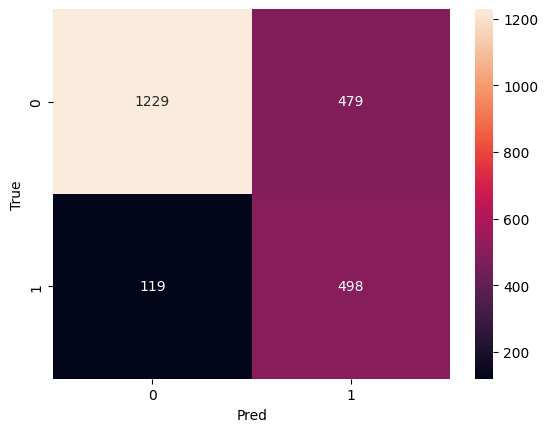

In [457]:
sns.heatmap(confusion_matrix(y_test, pred_test), annot = True, fmt='d')
plt.xlabel('Pred')
plt.ylabel('True')

#### **Pergunta**: O que você infere de todas essas métricas?

#### **Resposta**: Analisando as metrica do modelo, a primeira coisa é que nos dados de validacao o ROC-AUC apresentado foi de 0.91, enquanto nos dados de teste foi de 0.73, evidenciando um overfitting. O segundo ponto é a analise das métricas recall e precision. A primeira, apresenta um valor 0.83, o que significa que o modelo marca como churn 83% do total de churn nesse dataset, tendo um espaço de melhora de 17%. O segundo ponto é o precision, em torno de 0.45, o que é bem baixo.

Datasets desbalanceados vao ter sempre um trade-off entre precision e recall. Sempre. 

In [458]:
feature_imp = pd.DataFrame({'features': features,
                            'imp': pipeline[-1].best_estimator_.feature_importances_}).sort_values('imp', ascending=False)

In [459]:
feature_imp

,features,imp
9,Contract,0.275567
6,Tech Support,0.133149
3,Online Security,0.124381
2,Internet Service,0.096793
4,Online Backup,0.072149
5,Device Protection,0.067306
0,Senior Citizen,0.052911
8,Streaming Movies,0.049397
10,Payment Method,0.037909
7,Streaming TV,0.031938


#### **Pergunta:** Como aprimorar ainda mais os resultados?

#### **Resposta:**  Visto que o modelo esta com overfitting, é possivel que o encoder utilizado nas variaveis categoricas esteja aumentando consideravelmente a dimensionalidade do dataset ou também o SMOTE esteja afetando isso. Por fim, pode-se escolher qual métrica é mais importante: priorizar o precision ou recall e mudar o threshold de classificacao.


## Análise dos drivers de churn

Existem diversas maneiras de avaliar os principais *drivers* de churn para este caso ou das features com maior poder preditivo para o target em questão, de uma forma mais geral. Neste projeto, utilizaremos o conceito de **SHAP values**.

### SHAP Values


Shapley Values, comumente referidos como Shap Values, é um conceito derivado da teoria dos jogos que foi adaptado para a análise de modelos de machine learning. Essa técnica permite atribuir importância a cada feature (característica) em uma previsão específica feita por um modelo. Assim, o seu objetivo é trazer **explicabilidade** até para modelos mais complexos que, em princípio, seriam uma "caixa-preta" ininteligível.

O objetivo dos Shap Values é entender como a contribuição de cada feature afeta a saída ou previsão do modelo para um exemplo de entrada em particular. Em outras palavras, eles quantificam o quanto cada feature contribuiu para a diferença entre o valor predito pelo modelo para um determinado exemplo e o valor médio de todas as previsões.

Resumidamente, o conceito de Shap Values pode ser explicado da seguinte maneira:

- Contexto do problema: Imagine que temos um modelo de machine learning treinado e queremos explicar a previsão do modelo para um exemplo específico.

- Definição do Shap Value: O Shap Value para uma determinada feature em um exemplo de entrada é a contribuição média dessa feature para todas as possíveis combinações de features ao compará-la com o valor médio de todas as previsões.

**Exemplo**: Na figura abaixo, foram calculados diversos valores SHAP, ou seja, o resultado do target "y" para vários valores de features, porém com a feature MedInc fixada nos diferentes pontos do eixo x:

<img src="https://shap.readthedocs.io/en/latest/_images/example_notebooks_overviews_An_introduction_to_explainable_AI_with_Shapley_values_21_0.png" alt="crossval" width="40%">

Podemos, então, tirar uma média do valor de "y" para cada valor de x e isso vai nos dar uma ideia de como y se comporta quando x está naquele ponto. A diferença entre esse valor médio de x em cada ponto e o valor esperado de y em todos os casos (linha pontilhada horizontal cinza) é a contribuição de x para y.

<img src="https://shap.readthedocs.io/en/latest/_images/example_notebooks_overviews_An_introduction_to_explainable_AI_with_Shapley_values_20_0.png" alt="crossval" width="40%">


- Importância individual de features: Os Shap Values permitem medir a importância individual de cada feature em relação à previsão do modelo. Eles representam o quanto cada feature contribuiu para a diferença entre a previsão específica e a média das previsões do modelo.

- Propriedade de aditividade: Uma propriedade fundamental dos Shap Values é que eles são aditivos. Ou seja, a soma dos Shap Values de todas as features mais o valor médio das previsões do modelo é igual à previsão específica para o exemplo em questão.

Essa abordagem de interpretação é particularmente útil para entender as decisões de modelos de machine learning complexos, como Gradient Boosting Machines e Redes Neurais, que normalmente são caixas-pretas e difíceis de explicar. Com os Shap Values, os cientistas de dados e os stakeholders podem ganhar insights sobre quais características estão mais influenciando as previsões e compreender como o modelo toma decisões para cada exemplo de entrada. Essa interpretação da performance do modelo é valiosa em muitos cenários, como em decisões críticas, explicabilidade de modelos em aplicações reais, detecção de viés e em conformidade com regulamentos, onde é necessário entender como as características individuais afetam as previsões do modelo

[Biblioteca SHAP Values](https://shap.readthedocs.io/en/latest/)

#### **Tarefa**: Realize o plot do sumário da função de SHAP values uilizando [*shap.summary_plot()*](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html)

In [460]:
# A utilização da bica SHAP não é tão trivial. Por isso, vou deixar a configuração pronta para você fazer as modificações necessárias
import shap
shap.initjs()

# Tarefa: substitua seus dados de teste que você definiu acima pela variável x_test abaixo
X_sample = pd.DataFrame(pipeline[0].transform(X_test), columns = features) 

# Calculo do Shapvalues isando TreeExplainer
explainer = shap.TreeExplainer(
    best_model,
    data = X_sample,
    feature_perturbation="interventional",
    model_output="probability",
)
shap_values = explainer(X_sample)

[22:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


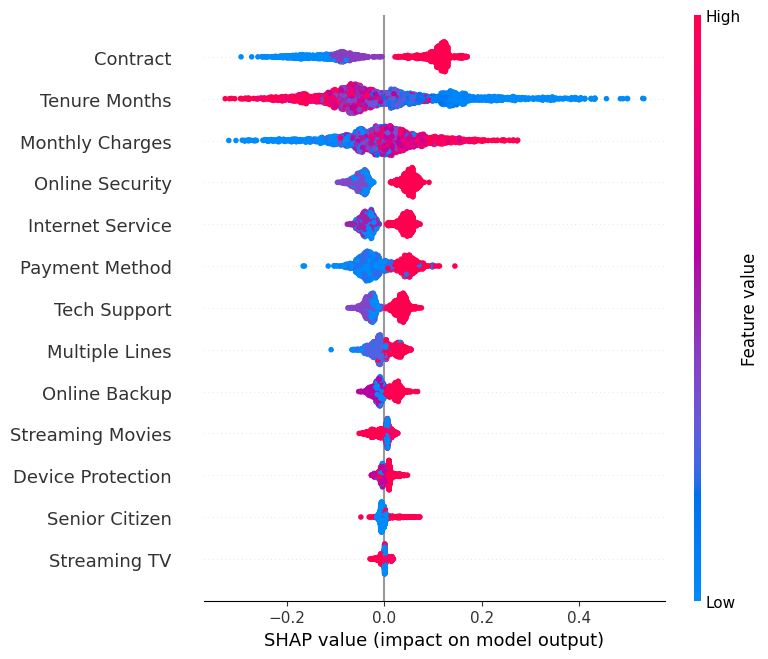

In [461]:
# Visualização do efeito médio das variáveis em ordem de prioridade para o modelo com summary_plot
shap.summary_plot(shap_values, X_sample) 

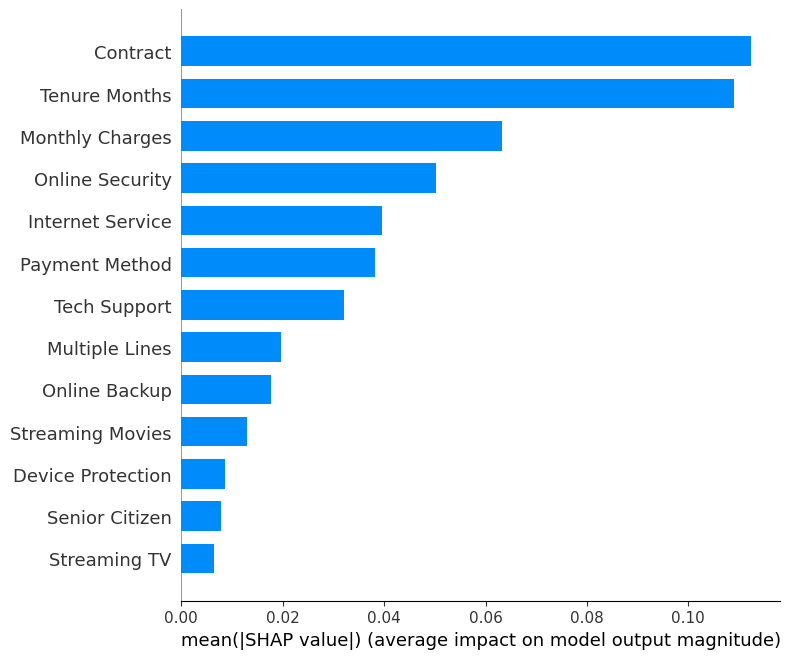

In [462]:
# Visualização do efeito médio das variáveis de forma absoluta com o plot em barras
shap.summary_plot(shap_values, X_sample, plot_type='bar') 

#### **Tarefa**: O que você consegue enxergar nos gráficos acima? Quais variáveis tem mais poder de modificar a probabilidade de churn?

#### **Resposta**: De acordo com o plot acima, as 3 variaveis mais importantes que impactam o churn sao: tipo de contrato, total charges e online security. Conforme visualizado na analise exploratoria, valores baixos de Monthly Charges (correlacionada com Total Charges) apresentavam uma maior chance de ocasionar churn. Além disso, tipo de contrato mensal também gerava uma maior probabilidade do cliente dar churn. Por fim, a variavel Online Security mostrou-se com potencial para afetar o churn, principalmente quando o cliente nao possuia protecao.


#### **Tarefa**: Visualize os shap_values para uma entrada individual qualquer (um número entre 0 e o tamanho máximo do seu dataset de teste)
[Use a função shap.plots.waterfall](https://shap.readthedocs.io/en/latest/generated/shap.plots.waterfall.html)


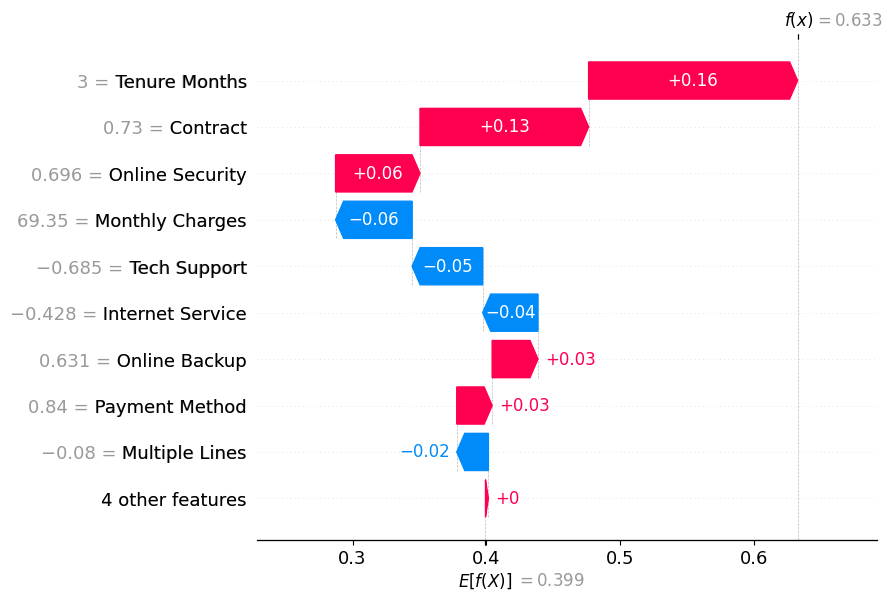

In [472]:
# Um exemplo de como podemos ver o shap values para entradas individuais
# Nesse caso, Tenure Month contribui com +21% na formação da probabilidade de churn, que nesse caso é 92.2%
shap.plots.waterfall(shap_values[-1])

# Agora é sua vez: varie os valores de entrada para verificar o comportamento do modelo para várias samples

Vamos olhar um pouco como os valores se comportam para Tenure Month e Monthly Charges que sao nossas variáveis numéricas.

#### **Tarefa**: Utilize o [shap.plots.scatter](https://meet.google.com/cmw-irdy-ayu) para verificar como os valores se comportam no caso de features específicas, como Tenure Months e Monthly Charges

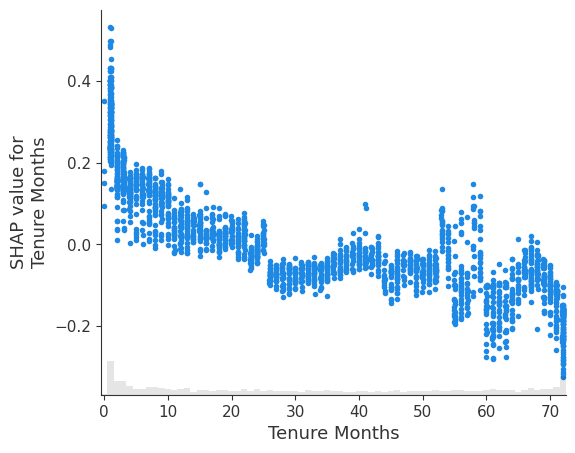

In [464]:
# Verifique como os valores se comportam para "Tenure Months"
shap.plots.scatter(shap_values[:,"Tenure Months"], show=False)

#### **Pergunta**: O que verificamos nesse gráfico? Há tenure months mais ligados ao churn que outros?

#### **Resposta**: Ha uma correlacao negativa entre a variavel Tenure Months e o impacto dela na variavel churn de acordo com o modelo. Os meses iniciais, principalmente o primeiro mes, sao decisivos para um cliente dar churn ou nao. Apos esse periodo, essa variavel começa ter menos efeito, visto que o cliente vai se tornando mais leal.


#### **Tarefa**: Faça o mesmo para Monthly Charges

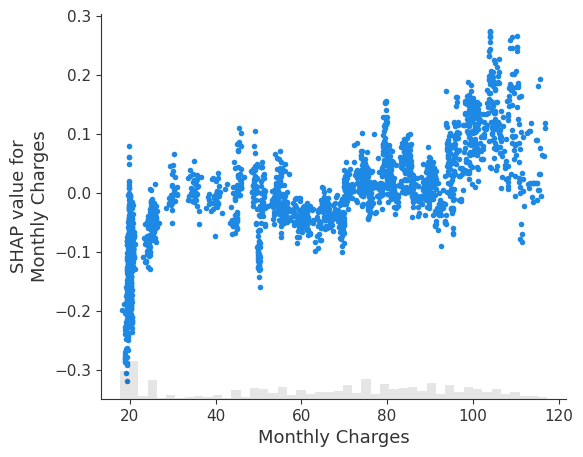

In [473]:
# Verifique como os valores se comportam para "Tenure Months"
shap.plots.scatter(shap_values[:,"Monthly Charges"], show=False)

#### **Pergunta**: O que podemos inferir desse gráfico? Há valores de Monthly Charges mais ligados à probabilidade de churn que outros? O impacto é equivalente ao de Tenure Months?

#### **Resposta**: Ja na variavel Monthly Charges, é o contrario. Conforme a variavel Monthly Charges aumenta, o impacto que o modelo atribui para churn é maior. O interessante é que quando o cliente gasta quase nada, o modelo atribui um peso alto à nao dar churn. Se ele gasta entre 30-90, em média, o peso é praticamente zero. Entretanto, passando do valor de 90, 100, ela começa ter mais impacto.


## Construindo a estratégia de retenção

Agora que você analisou as influência das variáveis no churn, você precisa criar as possíveis estratégias para redução do churn e retenção dos clientes e **calcular o impacto potencial** de cada uma delas na redução de churn. Pontos importantes para essa análise:
- Não se atenha apenas aos resultados da modelagem, mas considere também os insights que você tirou da **análise exploratória** que realizou lá em cima.
- Para o cálculo do potencial de retenção de cada estratégia, você vai considerar que **todos os clientes aceitaram** a oferta proposta.


Siga os seguintes passos para criar e testar suas hipóteses:

- Escolha de duas a quatro variáveis que se mostraram relevantes para o churn e são **acionáveis**. Variáveis **acionáveis** são variáveis que permitem à empresa **tomar uma ação**. Por exemplo, se um tipo de contrato faz o cliente ter mais churn, a empresa pode realizar ofertas para alterar o contrato do cliente.
- Crie um dataframe sintético para criar suas estratégias. Para isso, você deve **copiar** o dataframe de teste para esse novo dataframe.
- Agora, para cada estratégia, **altere** esse dataframe sintético criado acima de acordo. Por exemplo, se você escolher fazer uma oferta para alterar o tipo de contrato, selecione as variáveis que serão afetadas e as altere, considerando como se **todos os clientes** a tenham aceitado.
- O próximo passo consiste em dar esse dataset alterado como entrada do .predict() do seu modelo, da mesma forma que você fez para o dataset de teste lá em cima.
- Agora, calcule a diferença percentual entre o número de clientes que deram churn no novo cenário e no antigo (utilize as predições anteriores do modelo para ter consistência).

#### **Pergunta**: Quais variáveis acionáveis você irá selecionar?

#### **Resposta**: Internet Service e Payment Method.


### Estratégia 1

In [475]:
X_test['Payment Method'].unique()

array(['Bank transfer (automatic)', 'Mailed check', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

Campanha para convencer clientes que possuem fibra optica e pagam através do cheque à mudar seu tipo de pagamento para cartao de crédito.

#### **Tarefa**: Copie o dataframe de teste para o primeiro dataframe sintético, relacionado à primeira estratéfia

In [507]:
X_strategy1 = X_test.copy()

#### **Tarefa:** Altere o dataset segundo a estratégia que você selecionou

In [508]:
X_strategy1['Payment Method'] = np.where(
    (X_strategy1['Payment Method'].str.contains('check')) & 
    (X_strategy1['Internet Service'].str.contains('Fiber')),
    'Credit card (automatic)',
    X_strategy1['Payment Method']
)

#### **Tarefa**: Utilize *.predict()* para prever os valores do churn para o novo dataset

In [509]:
pred_strategy1 = pipeline.predict(X_strategy1)

#### **Tarefa**: Calcule a diferença percentual da quantidade de clientes que deram churn no caso inicial e nesse primeiro caso sintético.

In [510]:
antes = 100*np.sum(pred_test)/len(pred_test)
depois = 100*np.sum(pred_strategy1)/len(pred_strategy1)

print(f'Antes da Estratégia 1: {round(antes, 2)} %')
print(f'Depois da Estratégia 1: {round(depois, 2)} %')
print(f'Retençao de {round(antes-depois, 2)} %')

Antes da Estratégia 1: 42.02 %
Depois da Estratégia 1: 40.09 %
Retençao de 1.94 %


#### **Tarefa**: Faça isso para algumas estratégias e selecione a que lhe parecer mais viável em termos de % de retenção, mas também se a oferta lhe parece interessante para o cliente, pois estamos calculando o potencial caso todos os clientes aceitem e a retenção **real** vai depender dessa taxa de aceitação. Explique abaixo o que você aprendeu e suas considerações para a escolha da estratégia.

### Estratégia 2

Campanha de conversao de clientes que possuem contrato do tipo mensal para anual.

In [511]:
X_strategy2['Contract'] = X_strategy2['Contract'].replace('Month-to-month', 'One year')

In [512]:
pred_strategy2 = pipeline.predict(X_strategy2)

In [513]:
antes = 100*np.sum(pred_test)/len(pred_test)
depois = 100*np.sum(pred_strategy2)/len(pred_strategy2)

print(f'Antes da Estratégia 2: {round(antes, 2)} %')
print(f'Depois da Estratégia 2: {round(depois, 2)} %')
print(f'Retençao de {round(antes-depois, 2)} %')

Antes da Estratégia 2: 42.02 %
Depois da Estratégia 2: 22.28 %
Retençao de 19.74 %


In [529]:
X_strategy2['pred'] = pred_strategy2
X_test['pred'] = pred_test

total_lost_monthly_before = X_test[X_test['pred'] == 1]['Monthly Charges'].sum()
total_lost_monthly_after = X_strategy2[X_strategy2['pred'] == 1]['Monthly Charges'].sum()

print(f'Ganho monetario apos estratégia 2: {round(total_lost_monthly_before - total_lost_monthly_after, 2)/1e3},00')

Ganho monetario apos estratégia 2: 30.1829,00


### Estratégia 3

Campanha para oferecer aos clientes serviços de protecao na internet.

In [514]:
X_strategy3 = X_test.copy()

In [515]:
X_strategy3['Online Security'] = np.where(
    (X_strategy3['Internet Service'].str.contains('DSL')) | 
    (X_strategy3['Internet Service'].str.contains('Fiber')),
    'Yes',
    X_strategy3['Online Security']
)

In [516]:
pred_strategy3 = pipeline.predict(X_strategy3)

In [517]:
antes = 100*np.sum(pred_test)/len(pred_test)
depois = 100*np.sum(pred_strategy3)/len(pred_strategy3)

print(f'Antes da Estratégia 3: {round(antes, 2)} %')
print(f'Depois da Estratégia 3: {round(depois, 2)} %')
print(f'Retençao de {round(antes-depois, 2)} %')

Antes da Estratégia 3: 42.02 %
Depois da Estratégia 3: 35.4 %
Retençao de 6.62 %


## Conclusão

### Que estratégia você recomenda para o aumento da retenção e redução do churn?

Analisando a retençao das 3 estratégias selecionadas, a que mais tem potencial de ganho é a de troca de contrato dos clientes do tipo mensal para anual, retendo aproximadamente 20% dos clientes e com um ganho potencial de 30.129,00 considerando o gasto mensal dos clientes que seriam churn e foram convertidos.

### Qual o potencial de redução de churn dessa estratégia, caso todos os clientes endereçados aceitem a oferta?
O potencial de reduçao pode chegar até aproximadamente 20%.

### Que outros tipos de estratégias (menos mensuráveis) você acredita que poderiam funcionar (ex. estratégias de marketing)?

 Acredito que campanhas de marketing que possam fidelizar os clientes nos primeiros meses de contrato pode ser vantajoso, visto que boa parte do churn acontece bem no inicio. Além disso, melhorar a experiencia do cliente, através de um bom atendimento e suporte técnico também ajude à fortaceler os laços entre cliente e empresa.